# Part I - Exploration of Ford GoBike System Data
## by Uchechukwu Ozoemena

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

<!-- >**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.   -->



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
gobike = pd.read_csv('./201902-fordgobike-tripdata.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
gobike.shape

(183412, 16)

## wrangling steps
- drop rows with missing values
- convert start_time and end_time to datetime
- convert start_station_id and end_station_id and remove the trailing '.0'
- convert bike id to string
- convert user_type, member_gender to category, bike_share_for_all_trip to category
- convert member_birth_year to int
- create a new column for age
- create a new column for duration in minutes

#### 1. drop rows with missing values

##### Define
- drop all rows with missing values using dropna()

##### Code

In [6]:
gobike = gobike.dropna().reset_index(drop=True)

##### Test

In [7]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

#### 2. Convert start_time and end_time to datetime

#### Define
- convert start_time and end_time to datetime using the `to_datetime` function

##### Code

In [8]:
gobike['start_time'] = pd.to_datetime(gobike.start_time)
gobike['end_time'] = pd.to_datetime(gobike.end_time)

##### Test

In [9]:
print(gobike.start_time.dtypes)
print(gobike.end_time.dtypes)

datetime64[ns]
datetime64[ns]


#### 3. Convert start_station_id and end_station_id to string and remove the trailing '.0'

##### Define
- convert start_station_id and end_station_id to string using the `astype` function
- remove the trailing '.0' using the `str.replace` function

##### Code

In [10]:
gobike['start_station_id'] = gobike.start_station_id.astype(str).str.replace('.0', '', regex=False)
gobike['end_station_id'] = gobike.end_station_id.astype(str).str.replace('.0', '', regex=False)

##### Test

In [11]:
print(gobike.start_station_id.dtypes)
print(gobike.end_station_id.dtypes)

object
object


#### 4. Convert bike id to string

##### Define
- convert bike id to string using the `astype` function

##### Code

In [12]:
gobike['bike_id'] = gobike.bike_id.astype(str)

##### Test

In [13]:
print(gobike.bike_id.dtypes)

object


#### 5. convert user_type, member_gender to category, bike_share_for_all_trip to category

##### Define
- for each type, get the unique values, and convert to unordered category using the `astype` function

##### Code

In [14]:
gobike['user_type'] = gobike.user_type.astype('category')

In [15]:
gobike['bike_share_for_all_trip'] = gobike.bike_share_for_all_trip.astype('category')

In [16]:
gobike['member_gender'] = gobike.member_gender.astype('category')

##### Test

In [17]:
print(gobike.user_type.dtypes)
print(gobike.member_gender.dtypes)
print(gobike.bike_share_for_all_trip.dtypes)

category
category
category


#### 6. convert member_birth_year to int

##### Define
- convert member_birth_year to int using the `astype` function

##### Code

In [18]:
gobike['member_birth_year'] = gobike.member_birth_year.astype(int)

##### Test

In [19]:
print(gobike.member_birth_year.dtypes)

int64


#### 7. create a new column for age

##### Define
- create a new column for age by subtracting the `member_birth_year` column from the current year

##### Code

In [20]:
gobike['age'] = gobike.apply(lambda x: x.start_time.year - x.member_birth_year, axis=1)

##### Test

In [21]:
gobike.age.head()

0    35
1    47
2    30
3    45
4    60
Name: age, dtype: int64

#### 8. create a new column for duration in minutes

##### Define
- create a new column for duration in minutes by dividing the `duration_sec` column by 60

##### Code

In [22]:
gobike['duration_min'] = np.round(gobike.duration_sec / 60, 2)

##### Test

In [23]:
gobike.duration_min.head()

0     869.75
1    1030.90
2     608.17
3      26.42
4      29.88
Name: duration_min, dtype: float64

In [24]:
gobike.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,34.196865,11.733373
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,10.118731,27.370085
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,18.000000,1.020000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,27.000000,5.380000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,32.000000,8.500000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,39.000000,13.150000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,141.000000,1409.130000


In [25]:
print('min start', gobike.start_time.min())
print('max start', gobike.start_time.max())

min start 2019-02-01 00:00:20.636000
max start 2019-02-28 23:59:18.548000


In [26]:
print('min end', gobike.end_time.min())
print('max end', gobike.end_time.max())

min end 2019-02-01 00:04:52.058000
max end 2019-03-01 08:01:55.975000


### What is the structure of your dataset?

> The dataset shows biking stats for February 2019 for the greater San Francisco Bay area.

### What is/are the main feature(s) of interest in your dataset?

> trip time, user membership, user age and gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration, start time, end time, user type, member age, member gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### duration
#### question: what is the distribution of trip durations?

In [27]:
np.emath.logn(3, gobike.duration_sec).min()

3.7418786468855934

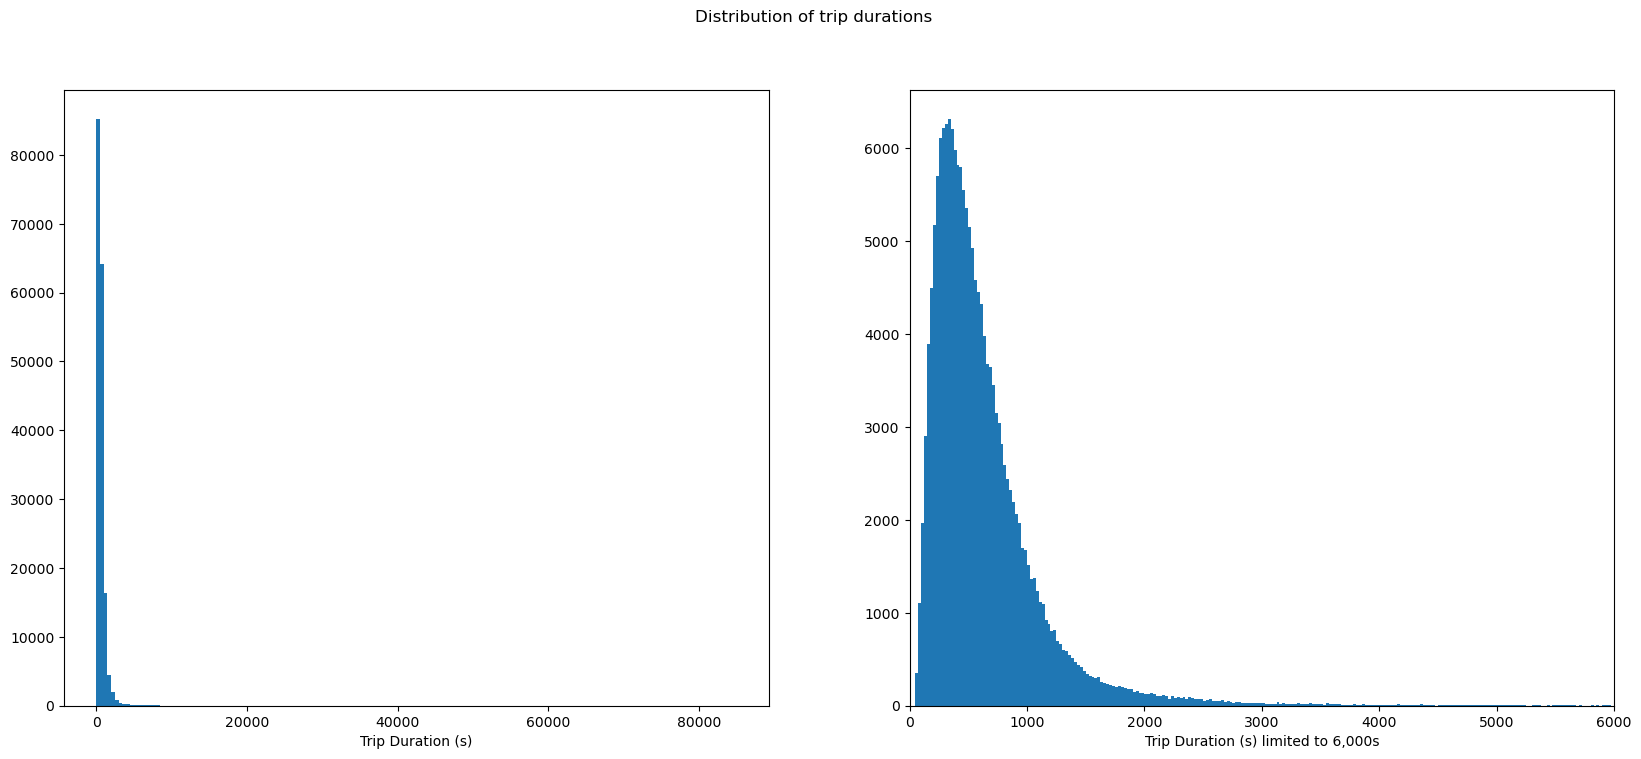

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

duration_bins = np.arange(0, gobike.duration_sec.max() + 500, 500)
ax1.hist(x=gobike.duration_sec, bins=duration_bins)
ax1.set_xlabel('Trip Duration (s)')

duration_bins = np.arange(0, gobike.duration_sec.max() + 25, 25)
ax2.set_xlim(0, 6e3)
ax2.hist(x=gobike.duration_sec, bins=duration_bins)
ax2.set_xlabel('Trip Duration (s) limited to 6,000s')

plt.suptitle('Distribution of trip durations');

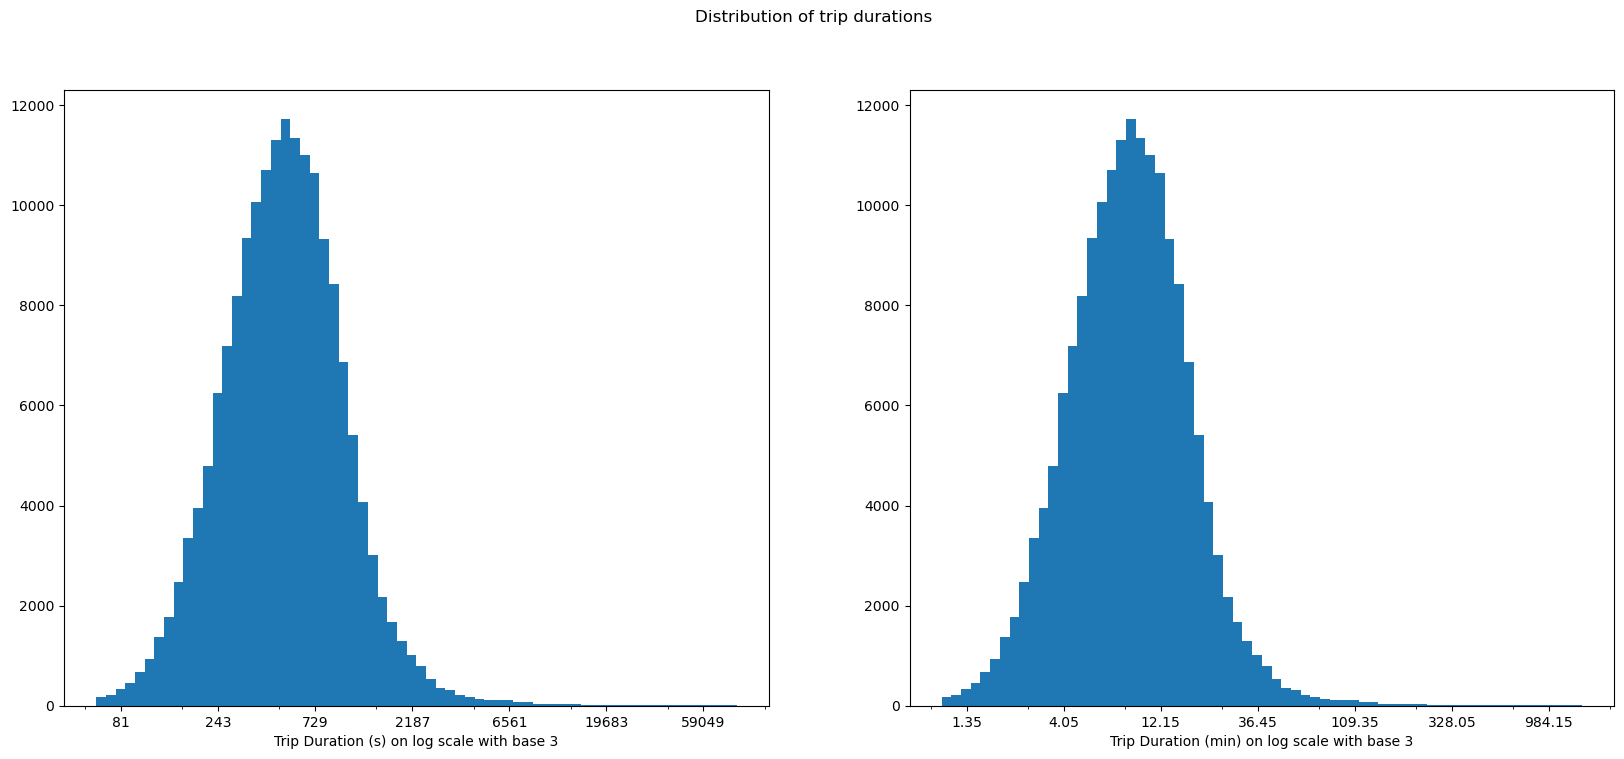

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

log_base = 3
duration_log_ticks = [81, 243, 729, 2187, 6561, 19683, 59049]
min_log_duration = np.emath.logn(log_base, gobike.duration_sec).min()
max_log_duration = np.emath.logn(log_base, gobike.duration_sec).max()
duration_log_bins = log_base ** np.arange(min_log_duration, max_log_duration + 0.1, 0.1)
ax1.hist(gobike.duration_sec, bins=duration_log_bins)
ax1.set_xscale('log', base=log_base)
ax1.set_xticks(duration_log_ticks, duration_log_ticks)
ax1.set_xlabel(f'Trip Duration (s) on log scale with base {log_base}')

duration_log_ticks_mins_labels = [f'{(sec / 60):.2f}' for sec in duration_log_ticks]
ax2.hist(gobike.duration_sec, bins=duration_log_bins)
ax2.set_xscale('log', base=log_base)
ax2.set_xticks(duration_log_ticks, duration_log_ticks_mins_labels)
ax2.set_xlabel(f'Trip Duration (min) on log scale with base {log_base}')

plt.suptitle('Distribution of trip durations');

#### observation

The distribution is right skewed, with a very long tail indicating some very long trips. Most trips are less than 40 mins long.

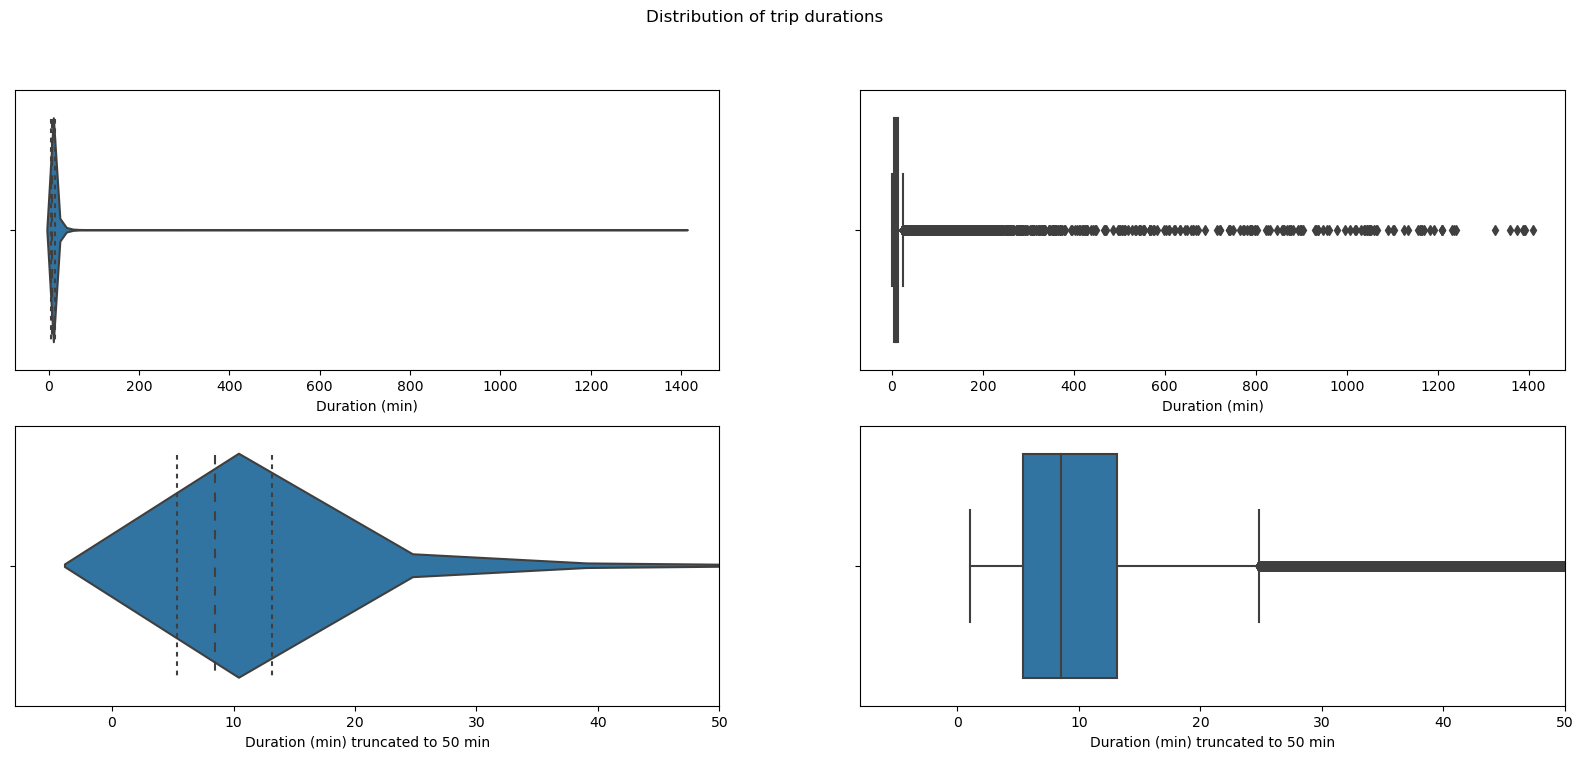

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 8))

sns.violinplot(data=gobike, x='duration_min', ax=ax1, inner='quartile')
ax1.set_xlabel('Duration (min)')
sns.boxplot(data=gobike, x='duration_min', ax=ax2)
ax2.set_xlabel('Duration (min)')
sns.violinplot(data=gobike, x='duration_min', ax=ax3, inner='quartile')
ax3.set_xlim(-8, 50)
ax3.set_xlabel('Duration (min) truncated to 50 min')
sns.boxplot(data=gobike, x='duration_min', ax=ax4)
ax4.set_xlim(-8, 50)
ax4.set_xlabel('Duration (min) truncated to 50 min')

fig.suptitle('Distribution of trip durations');



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

#### observation

The median trip is about 8 minutes long, and the majority of trips are clustered between 1 and 25 minutes.

### user_type
#### question: what is the distribution of user types?

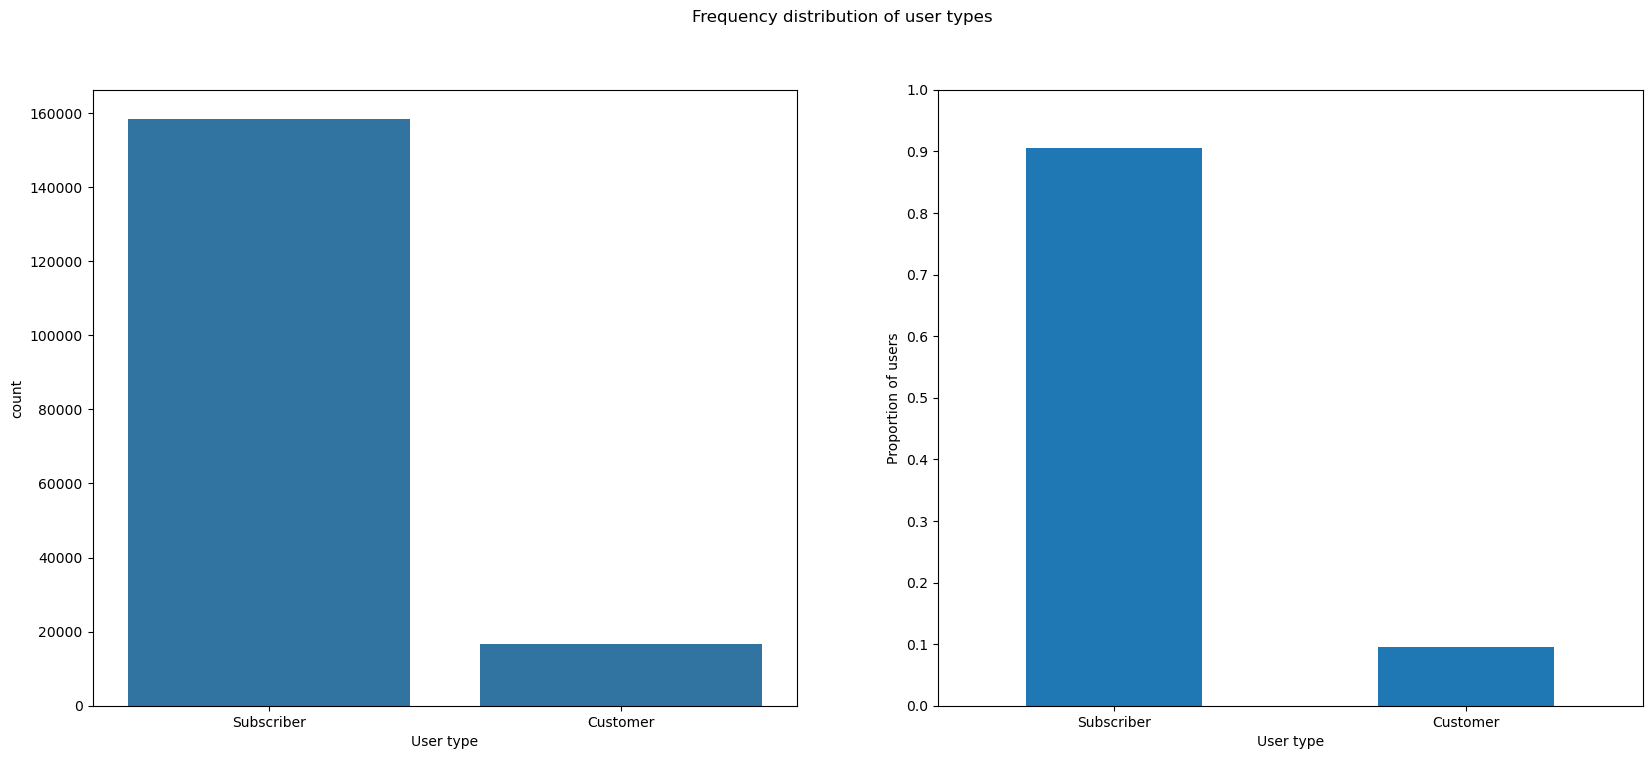

In [31]:
base_color = sns.color_palette()[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=gobike, x='user_type', ax=ax1, color=base_color, order=['Subscriber', 'Customer'])

ax1.set_xlabel('User type')

(gobike.user_type.value_counts() / gobike.shape[0]).plot.bar(ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

user_type_y_ticks = np.arange(0, 1 + 0.1, 0.1)
ax2.set_yticks(user_type_y_ticks, [f'{val:.1f}' for val in user_type_y_ticks])
ax2.set_xlabel('User type')
ax2.set_ylabel('Proportion of users')

plt.suptitle('Frequency distribution of user types');

#### observation

The dataset is heavily skewed towards subscribers, with less than 10% of the users being customers.

### member gender
#### question: what is the distribution of member gender?

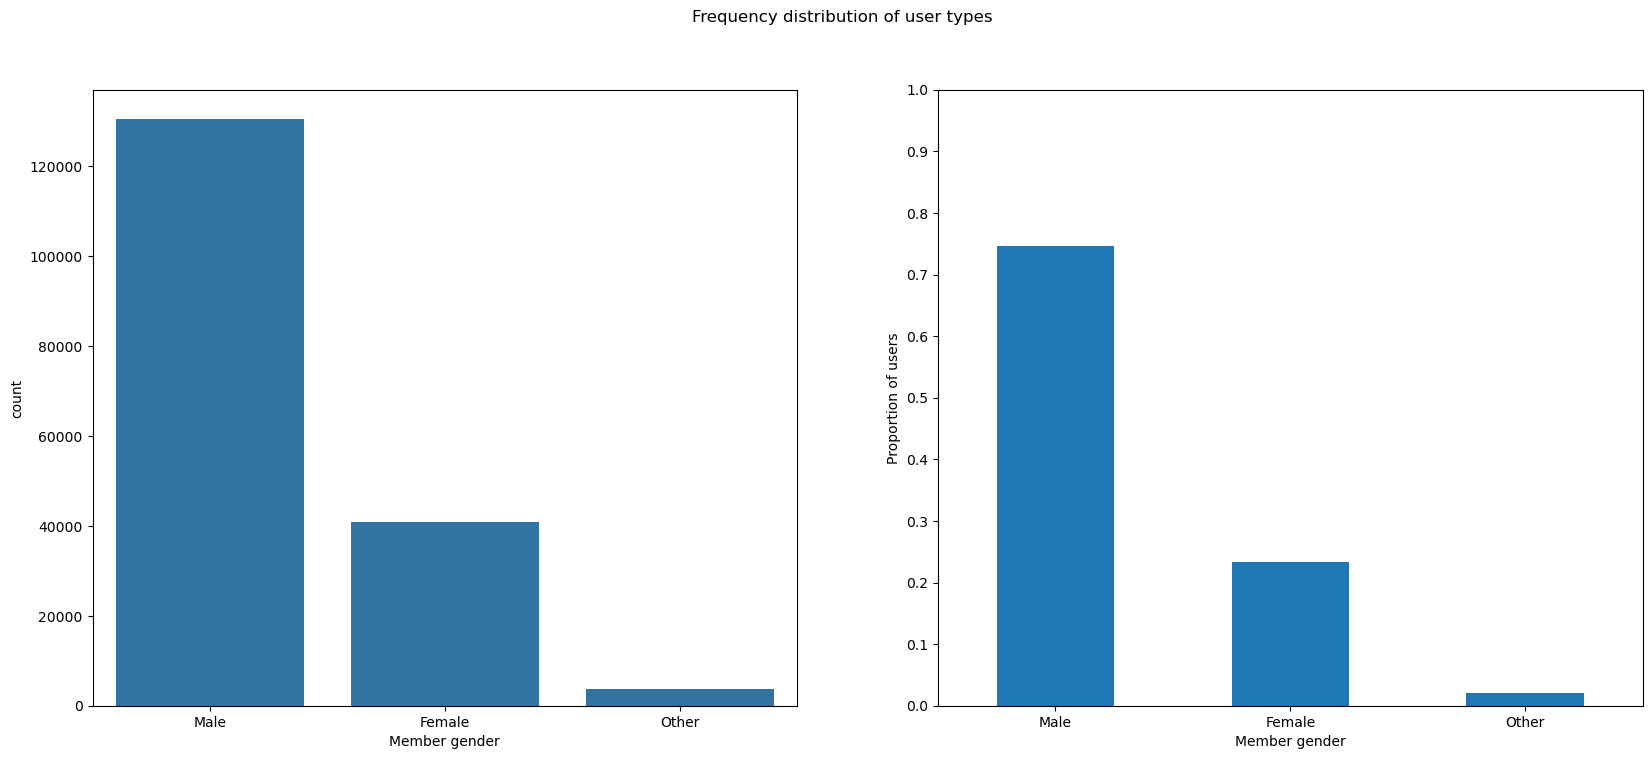

In [32]:
base_color = sns.color_palette()[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=gobike, x='member_gender', ax=ax1, color=base_color, order=['Male', 'Female', 'Other'])

ax1.set_xlabel('Member gender')

(gobike.member_gender.value_counts() / gobike.shape[0]).plot.bar(ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

user_type_y_ticks = np.arange(0, 1 + 0.1, 0.1)
ax2.set_yticks(user_type_y_ticks, [f'{val:.1f}' for val in user_type_y_ticks])
ax2.set_xlabel('Member gender')
ax2.set_ylabel('Proportion of users')

plt.suptitle('Frequency distribution of user types');

#### observation

The dataset is heavily skewed towards male and femal, with less than 5% of the users identifying as "Other". Overall, males dominate the dataset, accounting for more than 70% of users.

### member age
#### question: what is the distribution of member age?

In [33]:
gobike.age.max()

141

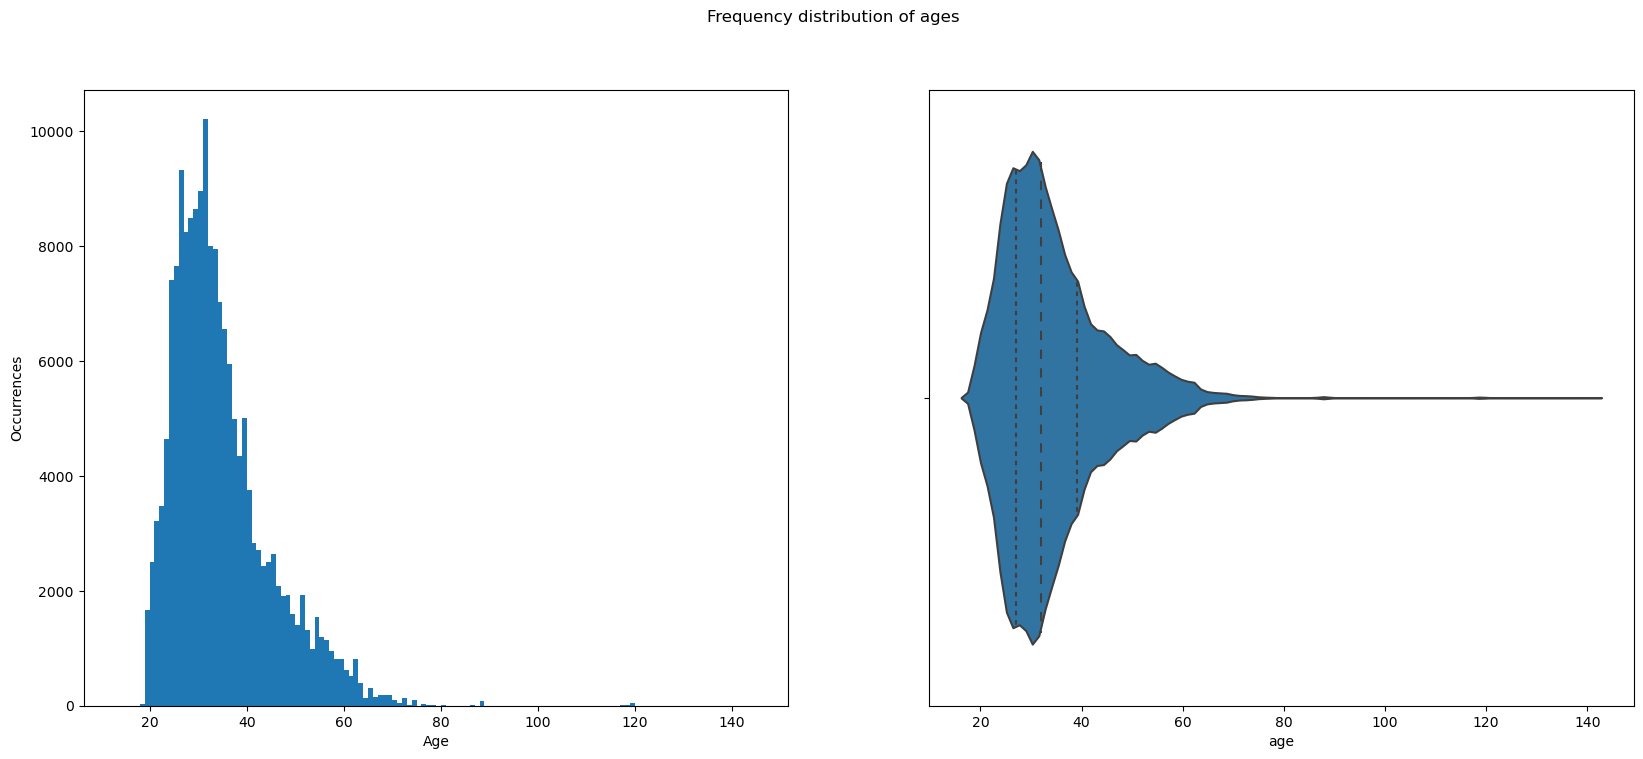

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.hist(data=gobike, x='age', bins=np.arange(gobike.age.min() - 5, gobike.age.max() + 5, 1))
ax1.set_xlabel('Age')
ax1.set_ylabel('Occurrences')

sns.violinplot(data=gobike, x='age', ax=ax2, inner='quartile')

plt.suptitle('Frequency distribution of ages');

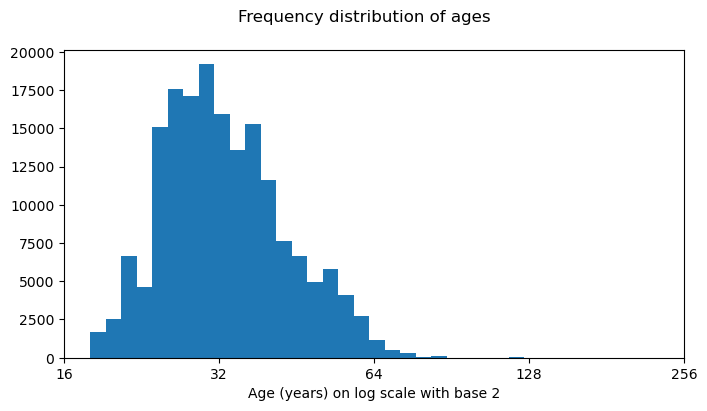

In [35]:
fig, ax = plt.subplots(figsize=(8, 4))

log_base = 2
duration_log_ticks = [16, 32, 64, 128, 256]
min_log_age = np.emath.logn(log_base, gobike.age).min()
max_log_age = np.emath.logn(log_base, gobike.age).max()
age_log_bins = log_base ** np.arange(min_log_age, max_log_age + 0.1, 0.1)
ax.hist(gobike.age, bins=age_log_bins)
ax.set_xscale('log', base=log_base)
ax.set_xticks(duration_log_ticks, duration_log_ticks)
ax.set_xlabel(f'Age (years) on log scale with base {log_base}')

plt.suptitle('Frequency distribution of ages');

#### Observation

The distribution is right skewed, with a very long tail indicating some very old users. Most users are older than 20 but younger than 60, so it's a dataset of working age adults.

### start time

#### question: what is the distribution of start time?

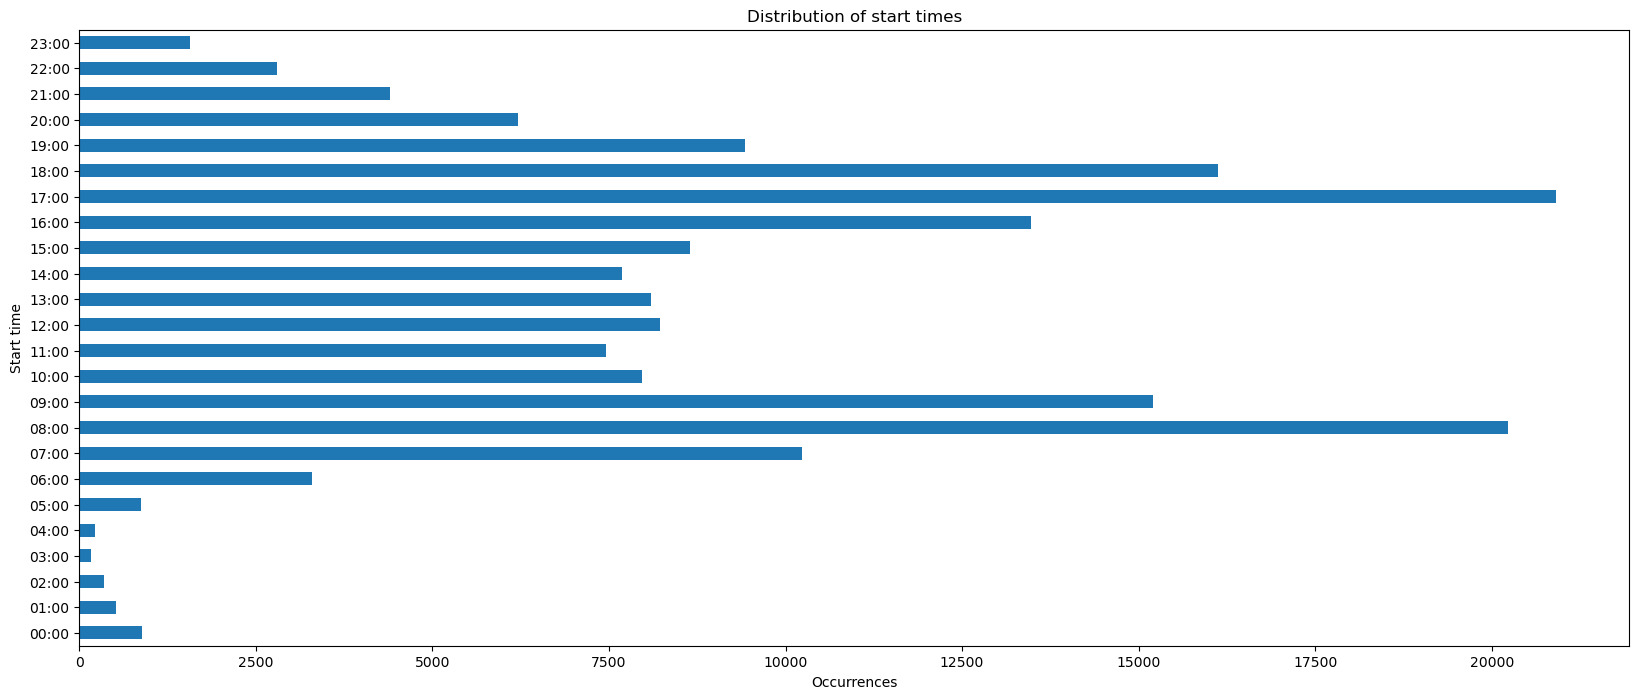

In [36]:
start_time_hour_bins = pd.cut(gobike.start_time.dt.hour, bins=np.arange(0, 24 + 1, 1), right=False, labels=[f'{i:02d}:00' for i in range(24)])
start_time_hour_group = gobike.start_time.groupby(start_time_hour_bins)
start_time_hour_counts = start_time_hour_group.size().reset_index(name='count')

start_time_hour_counts.plot.barh(x='start_time', y='count', figsize=(20, 8))
plt.xlabel('Occurrences')
plt.ylabel('Start time')
plt.title('Distribution of start times')
plt.legend().remove();

#### observation

The distribution is bimodal, with two peaks at 8am and 6pm. This suggests that the bikes may have been used for commuting to and from work, or for early morning and late evening errands or workouts.

### end time

#### question: what is the distribution of end time?

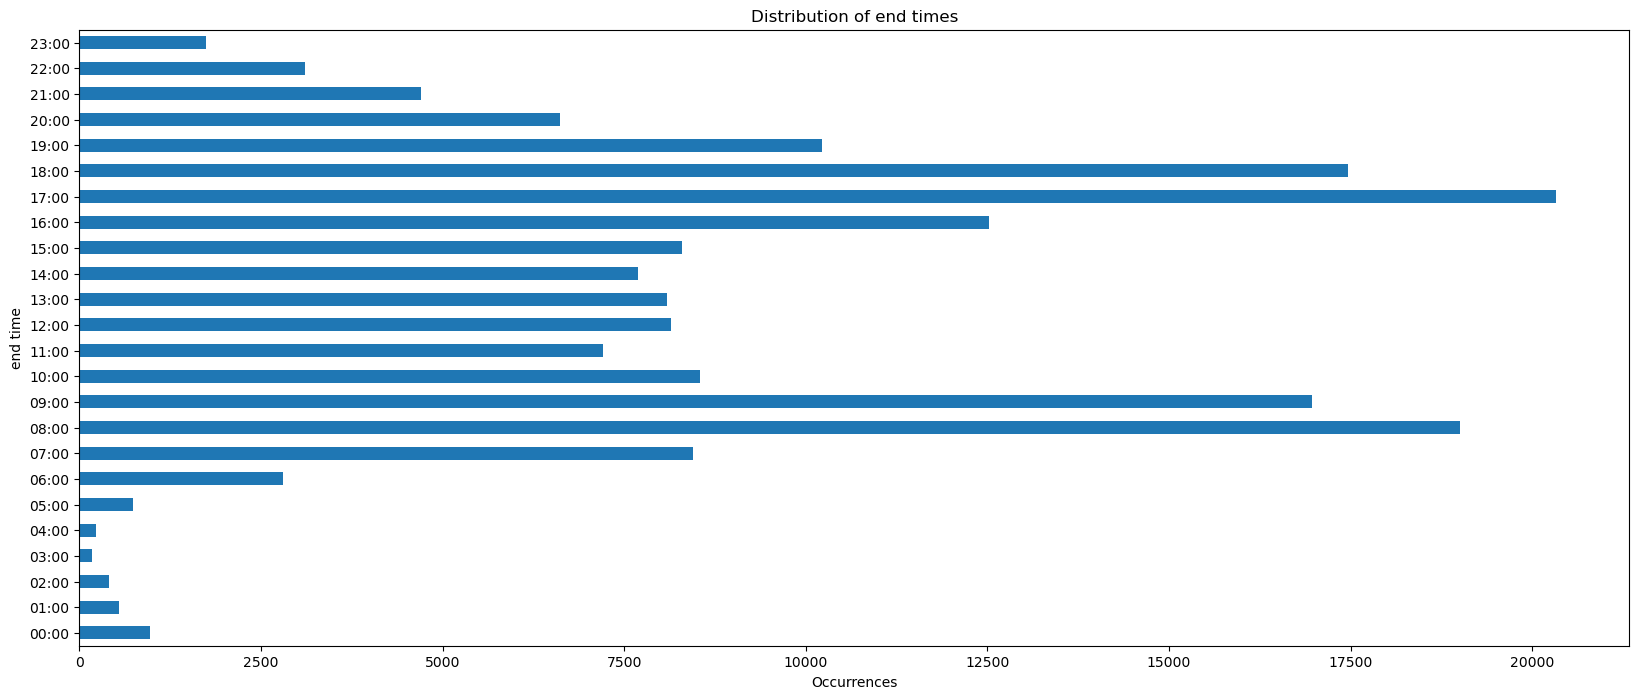

In [37]:
end_time_hour_bins = pd.cut(gobike.end_time.dt.hour, bins=np.arange(0, 24 + 1, 1), right=False, labels=[f'{i:02d}:00' for i in range(24)])
end_time_hour_group = gobike.end_time.groupby(end_time_hour_bins)
end_time_hour_counts = end_time_hour_group.size().reset_index(name='count')

end_time_hour_counts.plot.barh(x='end_time', y='count', figsize=(20, 8))
plt.xlabel('Occurrences')
plt.ylabel('end time')
plt.title('Distribution of end times')
plt.legend().remove();

#### observation

Very similarly to the start times distribution, this distribution is bimodal, with two peaks at 8am and 5pm. This distribution is likely driven by the same factors that drive the start times.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions of the variables of interest showed some unexpected results. The unusually long tail of trip durations was an example of this, with some trips lasting over 1000 minutes. There was also a surprisingly high concentration of males in the dataset, with more than 70% of the users reporting as male. And even more surprisingly, the long tail of ages revealed some centenarian users! The other variables of interest showed expected trends, with the majority of users being subscribers, the majority of trips being clustered between 1 and 36 minutes, the majority of users' ages being clustered between 20 and 60, and the majority of trips occurring in the early mornings and evenings.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most notably, the trip duration and age distributions were heavily right skewed. Using a log transformation (with bases 3 and 2, respectively) made the distributions more normal, and made it easier to see the distribution of the majority of the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### trip duration and member gender

#### question: is there any discernable trend between trip duration and member gender?

In [38]:
def duration_freq_poly(x, bins, **kwargs):
    """ Custom frequency polygon / line plot code. """
    bin_centers = (bins[1:] + bins[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)
    plt.ylabel('Frequency')
    plt.xscale('log')
    log_base = 3
    duration_log_ticks = [81, 243, 729, 2187, 6561, 19683, 59049]
    min_log_duration = np.emath.logn(log_base, gobike.duration_sec).min()
    max_log_duration = np.emath.logn(log_base, gobike.duration_sec).max()
    duration_log_bins = log_base ** np.arange(min_log_duration, max_log_duration + 0.1, 0.1)
    duration_log_ticks_mins_labels = [f'{(sec / 60):.2f}' for sec in duration_log_ticks]
    plt.xticks(duration_log_ticks, duration_log_ticks_mins_labels)


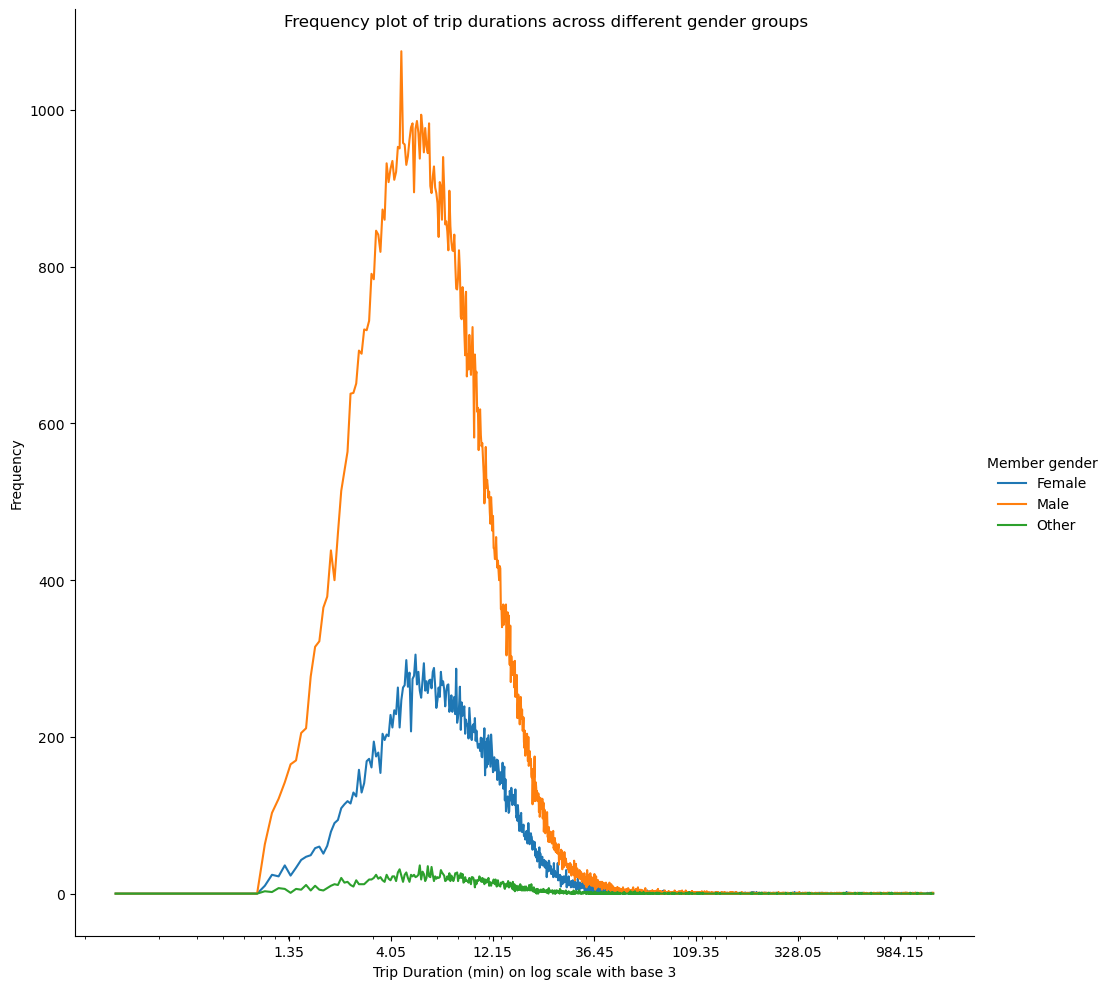

In [39]:
bin_edges = np.arange(10, gobike.duration_sec.max() + 5, 5)
g = sns.FacetGrid(data=gobike, hue='member_gender', height=10)
g.map(duration_freq_poly, 'duration_sec', bins=bin_edges)
g.add_legend(title='Member gender')
g.set_xlabels(f'Trip Duration (min) on log scale with base 3')
g.fig.suptitle('Frequency plot of trip durations across different gender groups');

#### observation

The figure shows that males constitute the majority of the rides, which is not surprising given their concentration in the dataset. Interestingly, the curve for males peaks slightly earlier than for females, suggesting that on average the ladies may have taken slightly longer rides. The curve for "Other" is much more spread out, suggesting that the sample size for this category is too small to draw any conclusions.

Text(0.5, 0.98, 'Distribution of trip durations across different genders')

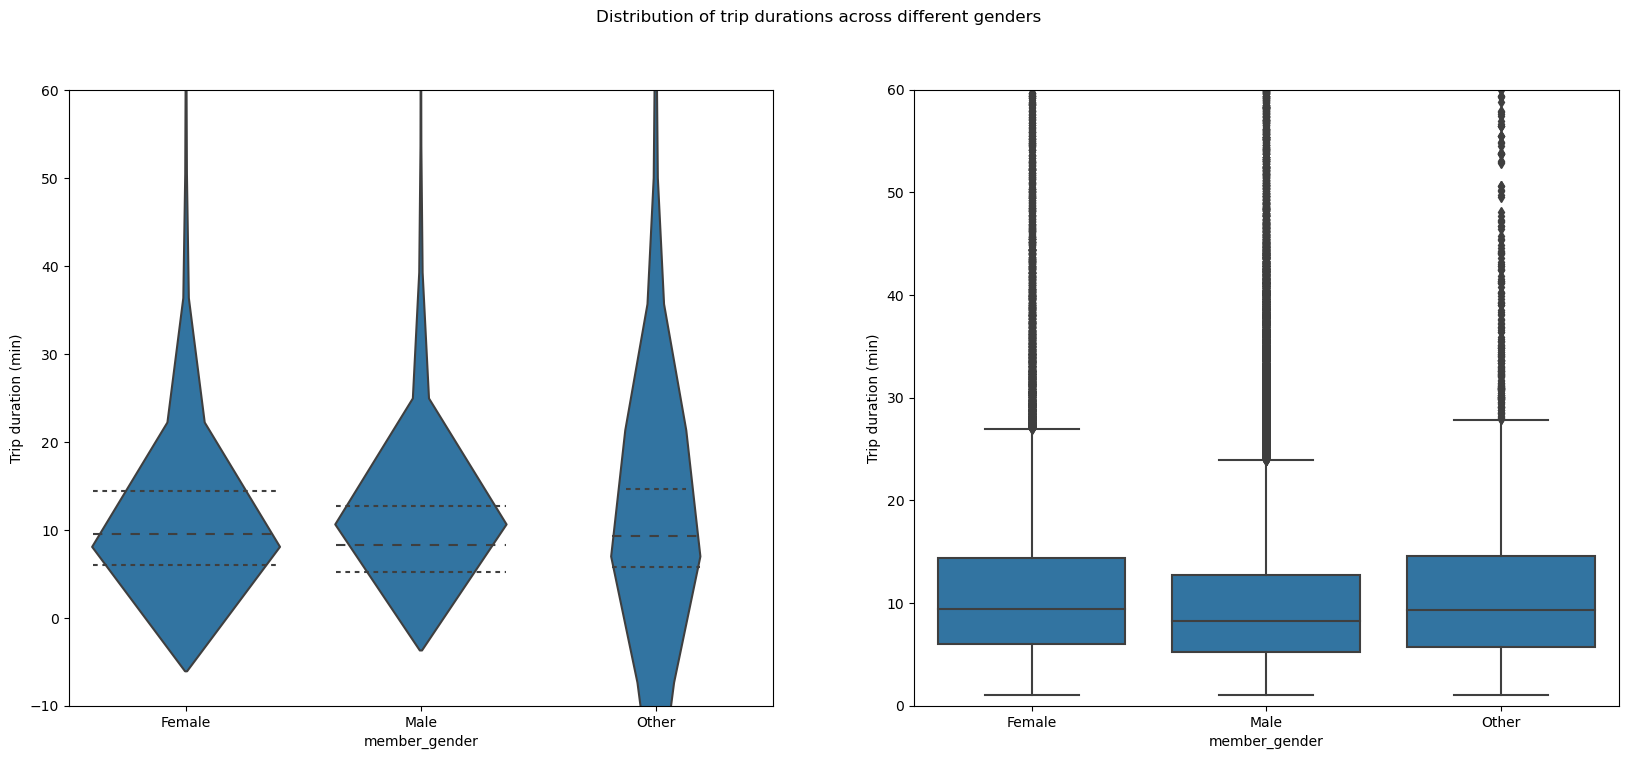

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.violinplot(data=gobike, x='member_gender', y='duration_min', inner='quartile', ax=ax1, color=base_color)
ax1.set_ylim(-10, 60)
ax1.set_ylabel('Trip duration (min)')

sns.boxplot(data=gobike, x='member_gender', y='duration_min', ax=ax2, color=base_color)
ax2.set_ylim(0, 60)
ax2.set_ylabel('Trip duration (min)')

plt.suptitle('Distribution of trip durations across different genders')

#### observation

These figures more clearly highlight the slightly higher average trip durations for females compared to males. It should be noted that the negative values in the left plot are not real values, but rather a feature of transformation performed to generate those plots as described [here](https://stats.stackexchange.com/a/483205).

### trip duration and user type

#### question: is there any discernable trend between trip duration and user type?

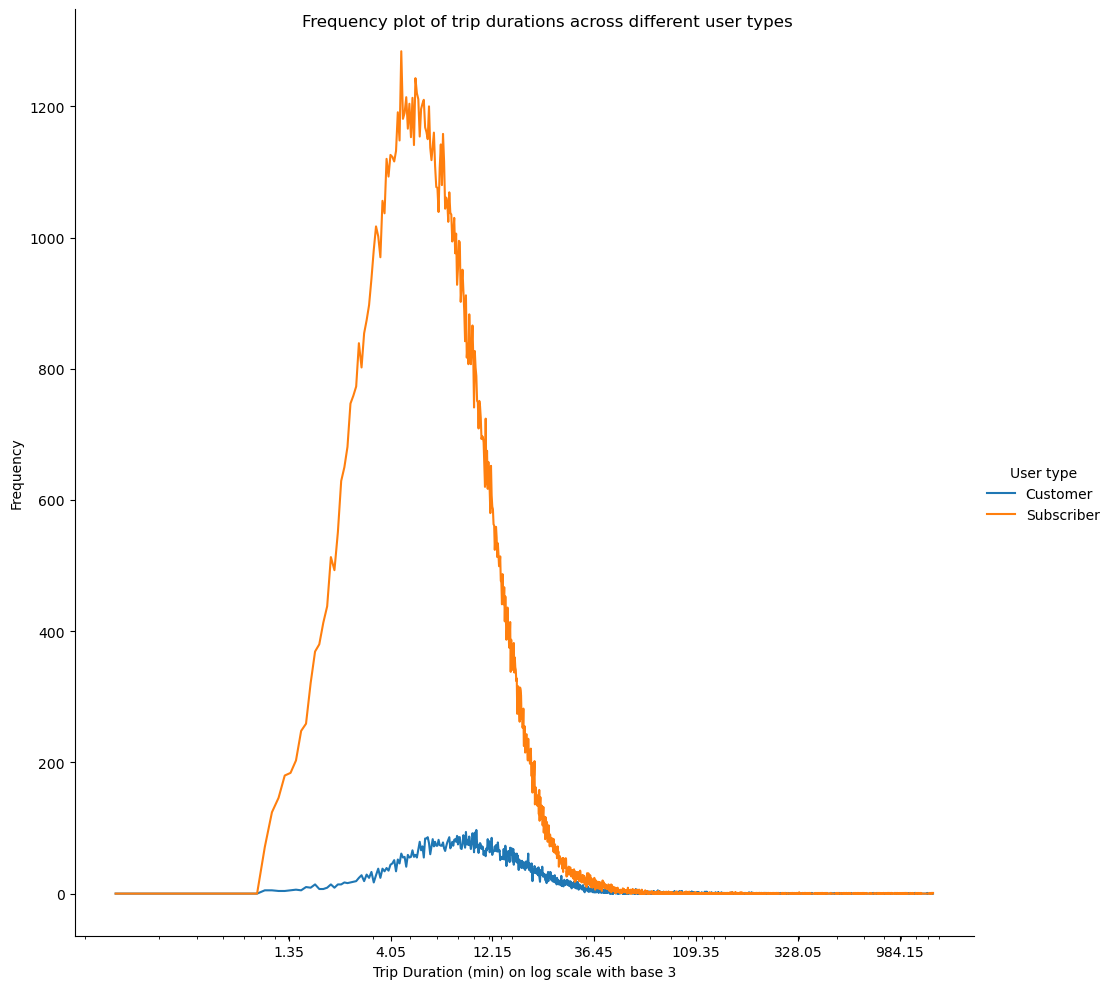

In [41]:
bin_edges = np.arange(10, gobike.duration_sec.max() + 5, 5)
g = sns.FacetGrid(data=gobike, hue='user_type', height=10)
g.map(duration_freq_poly, 'duration_sec', bins=bin_edges)
g.add_legend(title='User type')
g.set_xlabels(f'Trip Duration (min) on log scale with base 3')
g.fig.suptitle('Frequency plot of trip durations across different user types');

#### observation

The figure reinforces the earlier observation that subscribers constitute the majority of the rides. Interestingly, the peak of the curve for customers occurs at a higher duration than for subscribers, suggesting that on average the customers took longer rides.

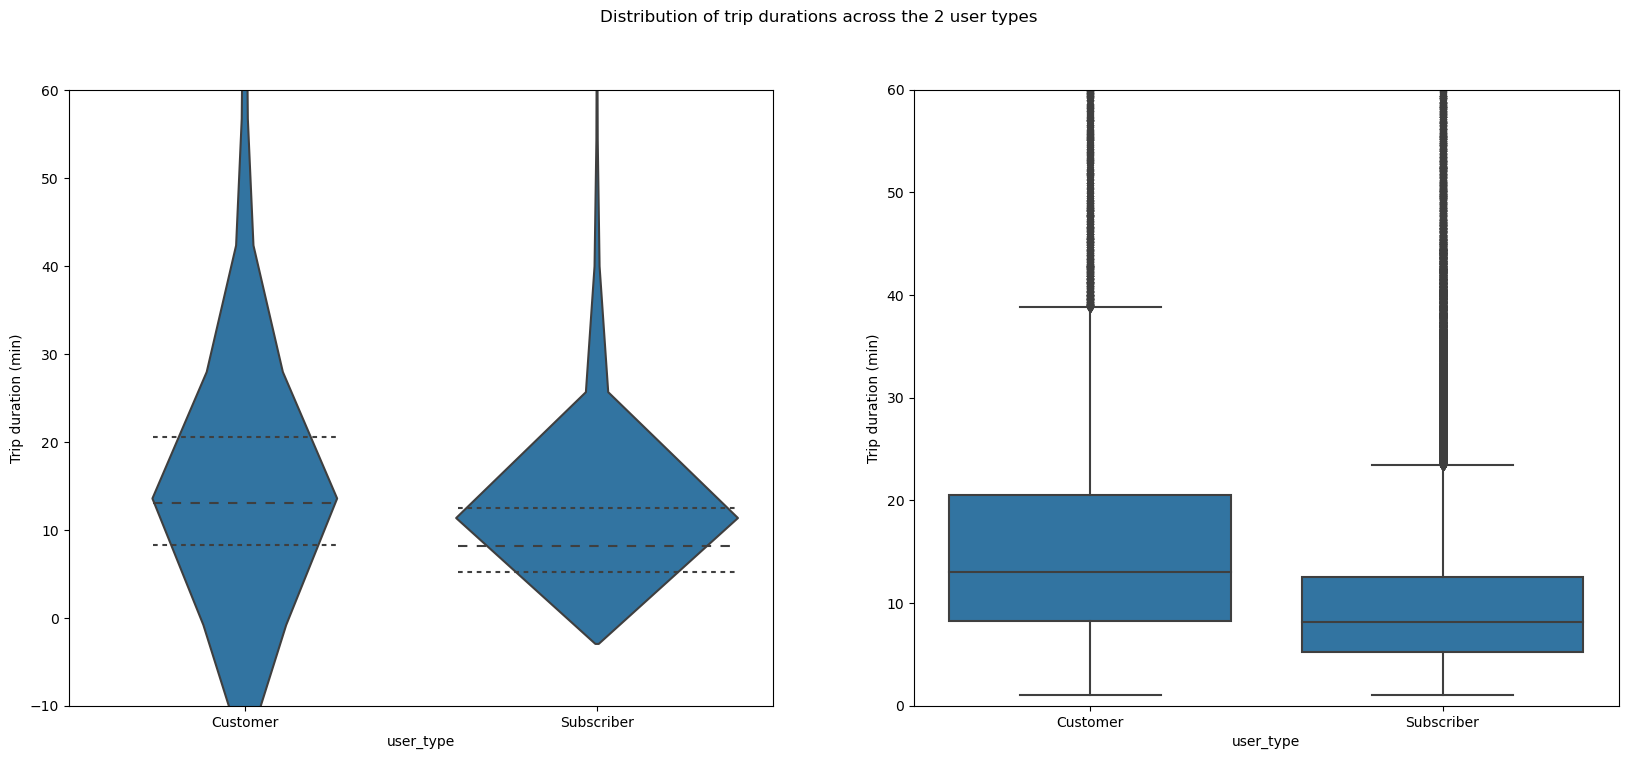

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.violinplot(data=gobike, x='user_type', y='duration_min', inner='quartile', ax=ax1, color=base_color)
ax1.set_ylim(-10, 60)
ax1.set_ylabel('Trip duration (min)')

sns.boxplot(data=gobike, x='user_type', y='duration_min', ax=ax2, color=base_color)
ax2.set_ylim(0, 60)
ax2.set_ylabel('Trip duration (min)')

plt.suptitle('Distribution of trip durations across the 2 user types');

#### observation

These figures more clearly highlight the higher average trip durations for customers compared to subscribers.

### member age and member gender

#### question: is there any discernable trend between member age and member gender?

In [43]:
def age_freq_poly(x, bins, **kwargs):
    """ Custom frequency polygon / line plot code. """
    bin_centers = (bins[1:] + bins[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    counts = x.groupby(data_bins).count()

    # create plot
    plt.errorbar(x = bin_centers, y = counts, **kwargs)
    plt.ylabel('Frequency')
    plt.xscale('log')
    log_base = 3
    x_log_ticks = [16, 32, 64, 128, 256]
    min_log_x = np.emath.logn(log_base, x).min()
    max_log_x = np.emath.logn(log_base, x).max()
    plt.xticks(x_log_ticks, x_log_ticks)


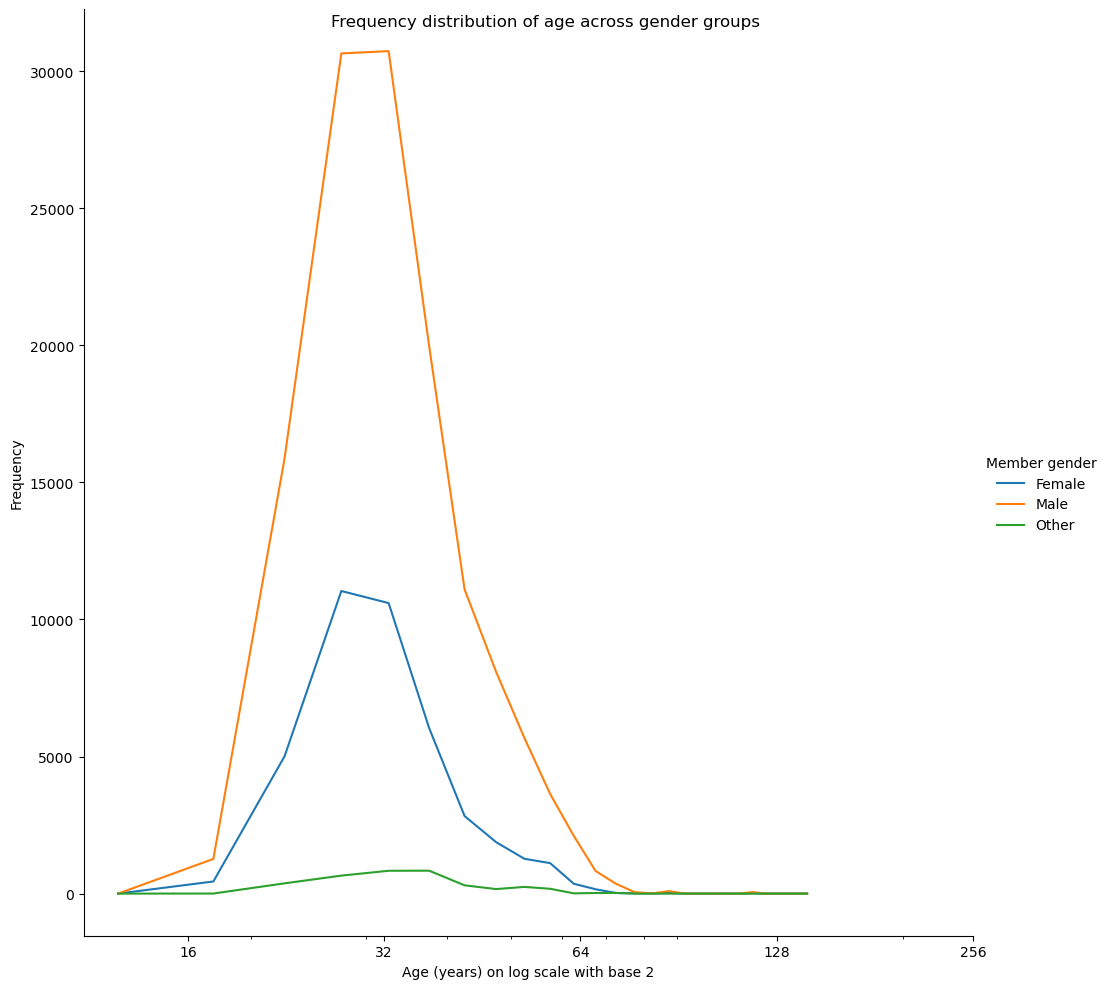

In [44]:
bin_edges = np.arange(10, gobike.age.max() + 5, 5)
g = sns.FacetGrid(data=gobike, hue='member_gender', height=10)
g.map(age_freq_poly, 'age', bins=bin_edges)
g.add_legend(title='Member gender')
g.set_xlabels(f'Age (years) on log scale with base 2')
g.fig.suptitle('Frequency distribution of age across gender groups');

#### observation

The figure shows that males constitute the majority of the rides, which is not surprising given their concentration in the dataset. The curve for males peaks slightly later for males than for females, suggesting that on average the men were slightly older. The curve for "Other" is much more spread out, though its peak comes at the highest age of the three categories.

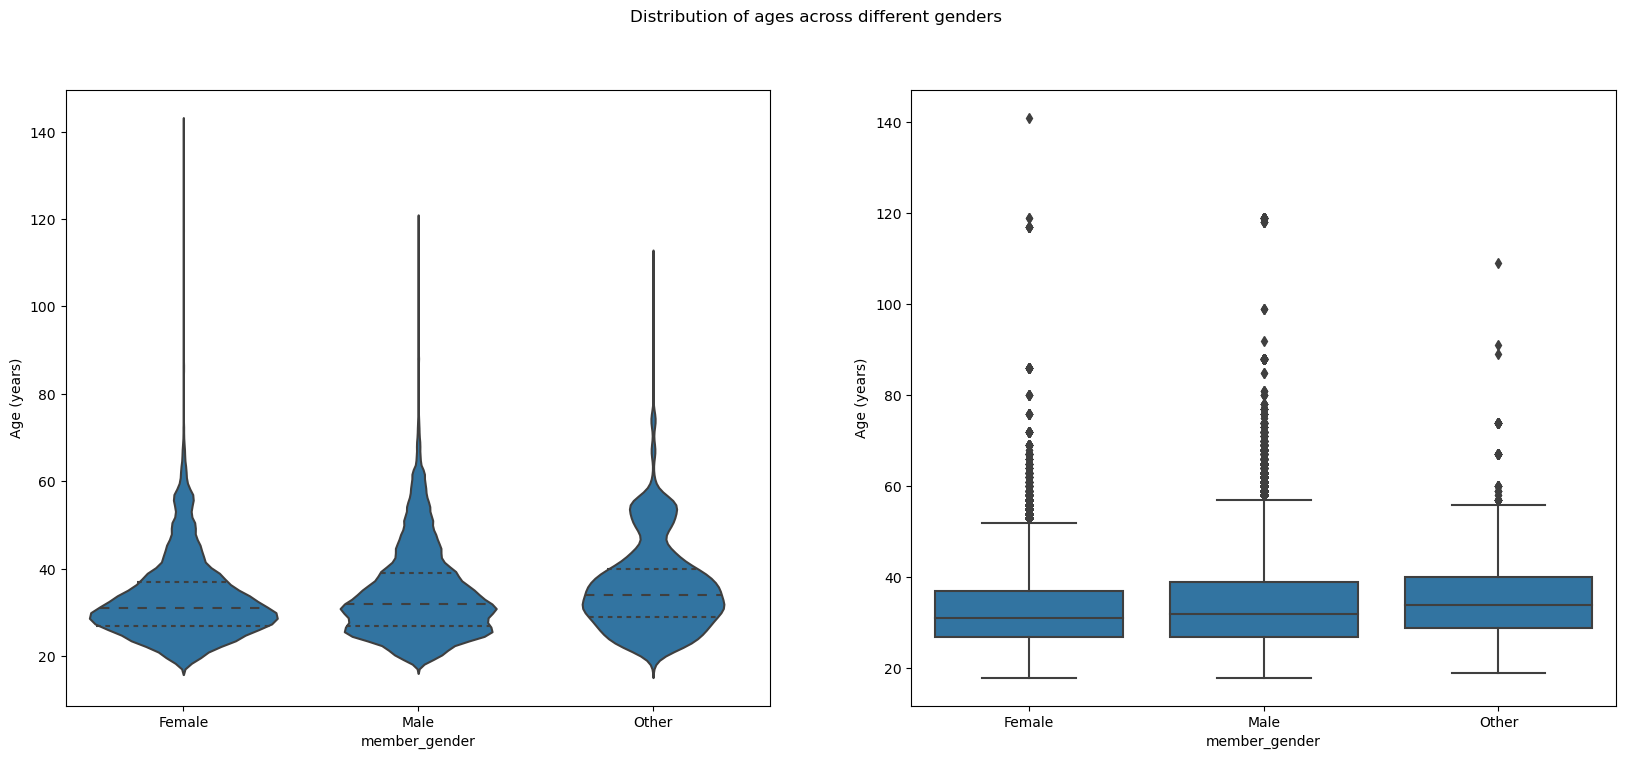

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.violinplot(data=gobike, x='member_gender', y='age', inner='quartile', ax=ax1, color=base_color)
ax1.set_ylabel('Age (years)')

sns.boxplot(data=gobike, x='member_gender', y='age', ax=ax2, color=base_color)
ax2.set_ylabel('Age (years)')

plt.suptitle('Distribution of ages across different genders');

#### observation

These figures more clearly highlight the slightly higher average ages for males compared to females, and for males compared to those who reported as "Other". Also, the "Other" category appears to be slightly bimodal, with a peak at above 30 and another closer to 60.

In [46]:
gobike_start_hour_group = gobike.groupby([start_time_hour_bins]).mean(numeric_only=True).reset_index()
gobike_start_hour_group

,start_time,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age,duration_min
0,00:00,808.895857,37.773204,-122.326088,37.772213,-122.326039,1988.030235,30.969765,13.481680
1,01:00,652.451429,37.752583,-122.308867,37.750746,-122.309063,1988.186667,30.813333,10.874095
2,02:00,1069.780282,37.711749,-122.285942,37.713156,-122.287350,1989.239437,29.760563,17.829634
3,03:00,1471.884146,37.776817,-122.337393,37.775526,-122.337645,1985.012195,33.987805,24.531524
4,04:00,685.189427,37.779623,-122.379876,37.783302,-122.378350,1975.876652,43.123348,11.419780
5,05:00,601.254042,37.764632,-122.353327,37.765631,-122.350025,1982.302540,36.697460,10.020935
6,06:00,534.783784,37.773076,-122.365890,37.773974,-122.362163,1982.689037,36.310963,8.913119
7,07:00,613.769426,37.777624,-122.365502,37.780062,-122.360951,1983.638256,35.361744,10.229526
8,08:00,656.170762,37.777152,-122.370501,37.780308,-122.365317,1984.150541,34.849459,10.936164
9,09:00,651.730400,37.775038,-122.364424,37.777797,-122.361517,1984.708432,34.291568,10.862170


In [47]:
gobike_end_hour_group = gobike.groupby([end_time_hour_bins]).mean(numeric_only=True).reset_index()
gobike_end_hour_group

,end_time,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,age,duration_min
0,00:00,912.940933,37.773814,-122.331699,37.772844,-122.331960,1987.622798,31.377202,15.215772
1,01:00,818.715342,37.755997,-122.305874,37.754003,-122.305805,1988.242144,30.757856,13.645157
2,02:00,1160.301235,37.714189,-122.288590,37.715575,-122.289401,1989.222222,29.777778,19.338173
3,03:00,1041.815476,37.770131,-122.338986,37.767196,-122.340004,1986.017857,32.982143,17.363810
4,04:00,896.564444,37.780498,-122.370721,37.783766,-122.369914,1976.235556,42.764444,14.942667
5,05:00,732.925474,37.764792,-122.351523,37.765376,-122.348602,1982.662602,36.337398,12.215420
6,06:00,544.844397,37.772616,-122.365537,37.773072,-122.362079,1982.447537,36.552463,9.080767
7,07:00,609.955137,37.777147,-122.361903,37.778957,-122.358004,1983.458570,35.541430,10.165980
8,08:00,654.205660,37.777628,-122.369880,37.780773,-122.364645,1984.177519,34.822481,10.903437
9,09:00,658.513521,37.775236,-122.367135,37.778201,-122.363699,1984.562305,34.437695,10.975207


### start/end time and duration

#### question: is there any discernable trend between start/end time and trip duration?

/var/folders/n6/1rqbgtyn1mx4km2y_v9vchlm0000gn/T/ipykernel_2766/156706006.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/var/folders/n6/1rqbgtyn1mx4km2y_v9vchlm0000gn/T/ipykernel_2766/156706006.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


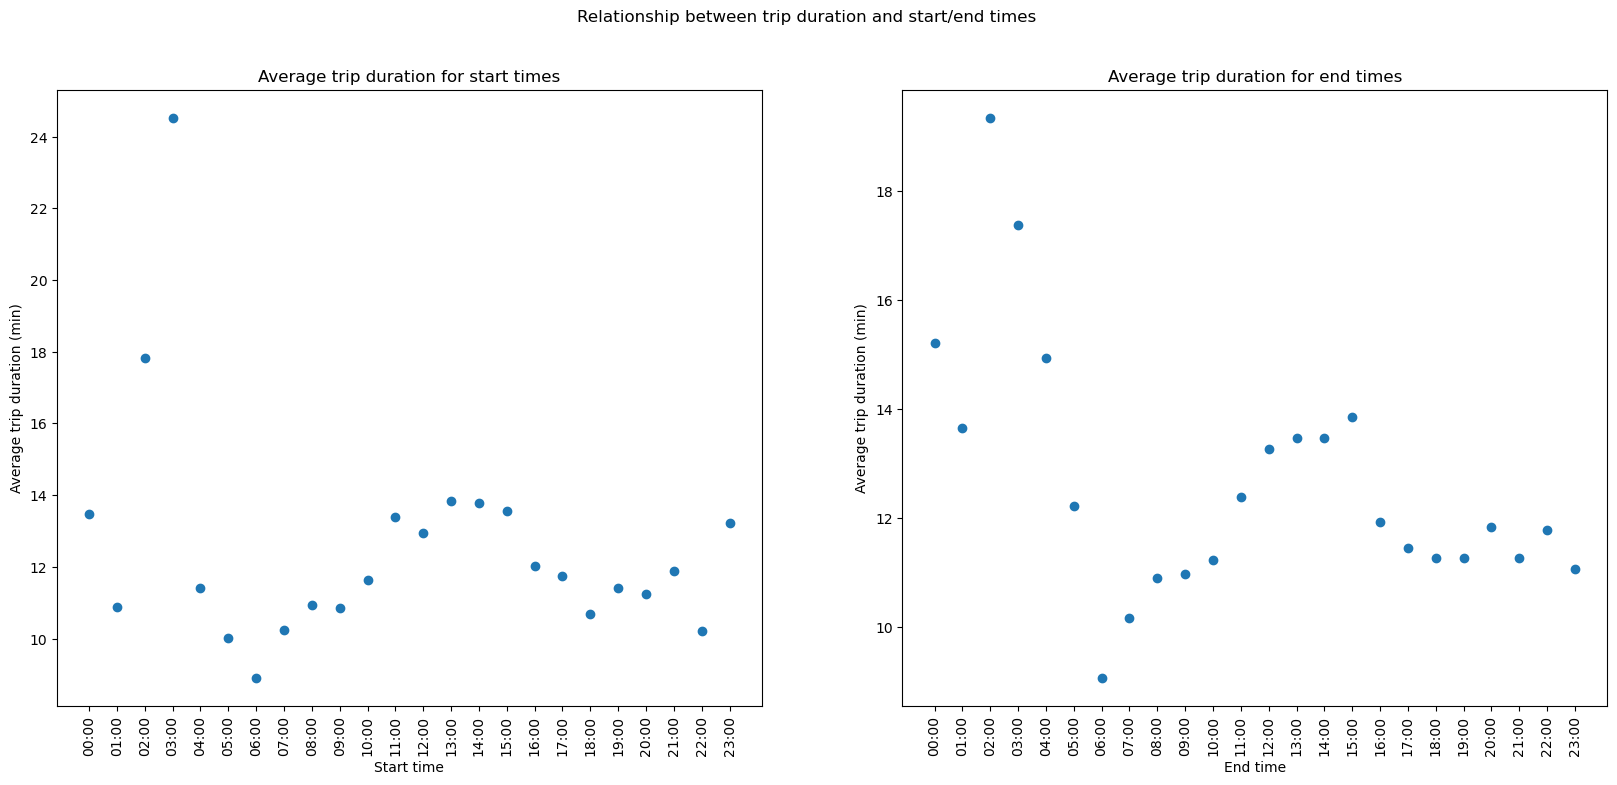

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.scatter(data=gobike_start_hour_group, x='start_time', y='duration_min')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel('Average trip duration (min)')
ax1.set_xlabel('Start time')
ax1.set_title('Average trip duration for start times')

ax2.scatter(data=gobike_end_hour_group, x='end_time', y='duration_min')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_ylabel('Average trip duration (min)')
ax2.set_xlabel('End time')
ax2.set_title('Average trip duration for end times')

fig.suptitle('Relationship between trip duration and start/end times');

#### observation

There's a trend of longer trip durations on either side of sunrise and sunset, which is not surprising given that the dataset is likely to be heavily skewed towards commuters. Most strikingly, the longest trips appear to have taken place in the very early hours of the morning, a few hours after midnight.

### start time and age

#### question: is there any discernable trend between start time and member age?

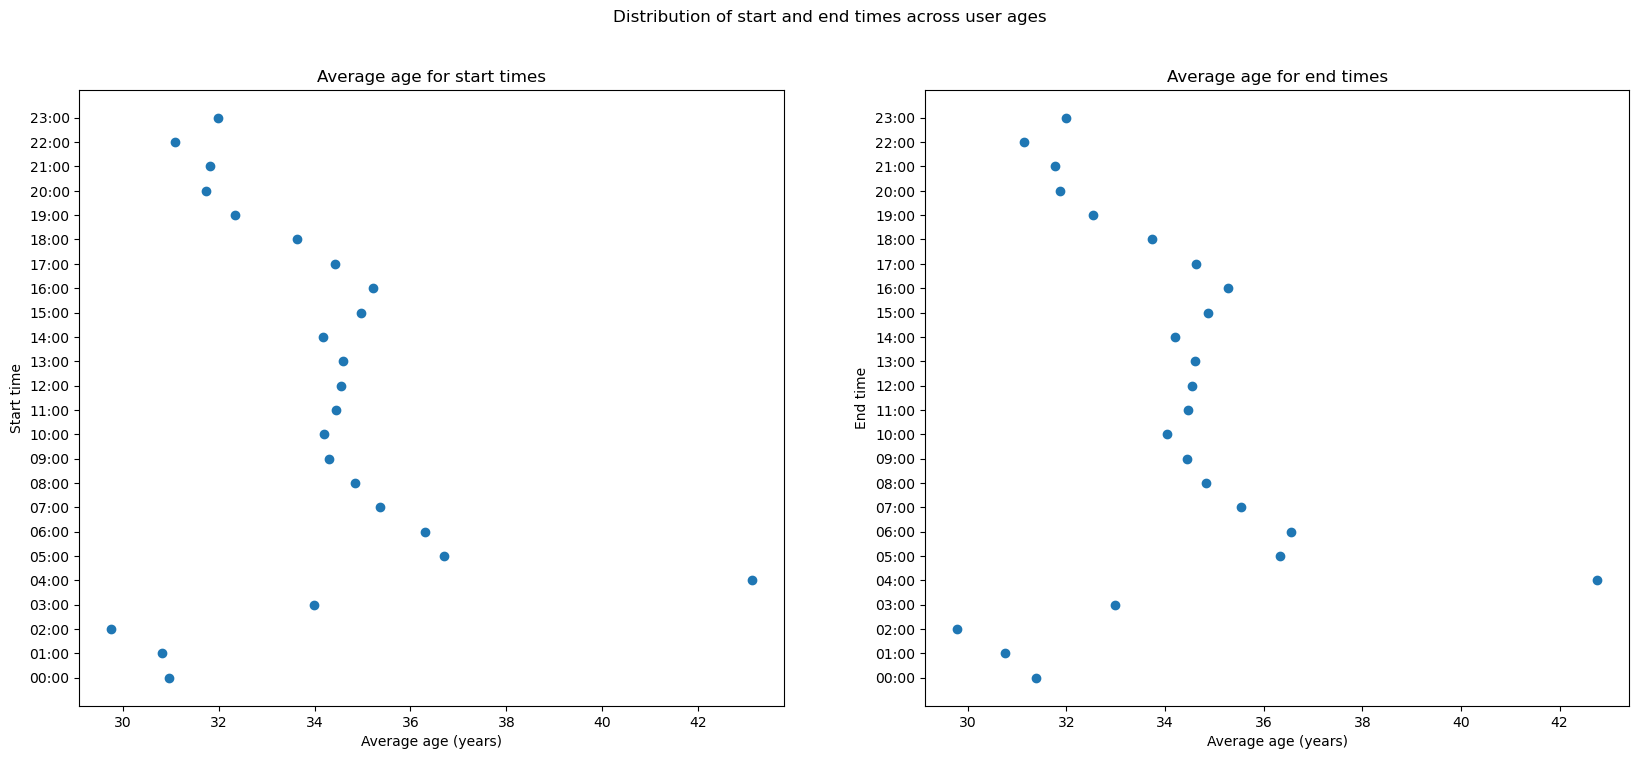

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.scatter(data=gobike_start_hour_group, y='start_time', x='age')
ax1.set_xlabel('Average age (years)')
ax1.set_ylabel('Start time')
ax1.set_title('Average age for start times')

ax2.scatter(data=gobike_end_hour_group, y='end_time', x='age')
ax2.set_xlabel('Average age (years)')
ax2.set_ylabel('End time')
ax2.set_title('Average age for end times')

fig.suptitle('Distribution of start and end times across user ages');

#### observation

The most notable trend occurs between the ages of 31 and 37, where start/end times occur increasingly earlier in the day as the age increases. The figure also indicates that younger users tend to use the bikes late at night and shortly after midnight, whereas the more middle aged users tend to use the bikes when the sun is up. There's a visible spike in average age of early morning riders, though it's not clear what may be driving that occurrence.

### user type and member gender

#### question: is there any discernable trend between user type and gender?

In [50]:
user_type_gender_group = gobike.groupby(['user_type', 'member_gender']).size().reset_index(name='count').pivot(index='user_type', values='count', columns='member_gender')
user_type_gender_group

member_gender,Female,Male,Other
user_type,,,
Customer,4623,11493,450
Subscriber,36182,119007,3197


In [51]:
user_type_gender_group_proportion = user_type_gender_group.apply(lambda x: x / user_type_gender_group.sum().sum(), axis=1)
user_type_gender_group_proportion

member_gender,Female,Male,Other
user_type,,,
Customer,0.026424,0.065692,0.002572
Subscriber,0.206811,0.680227,0.018274


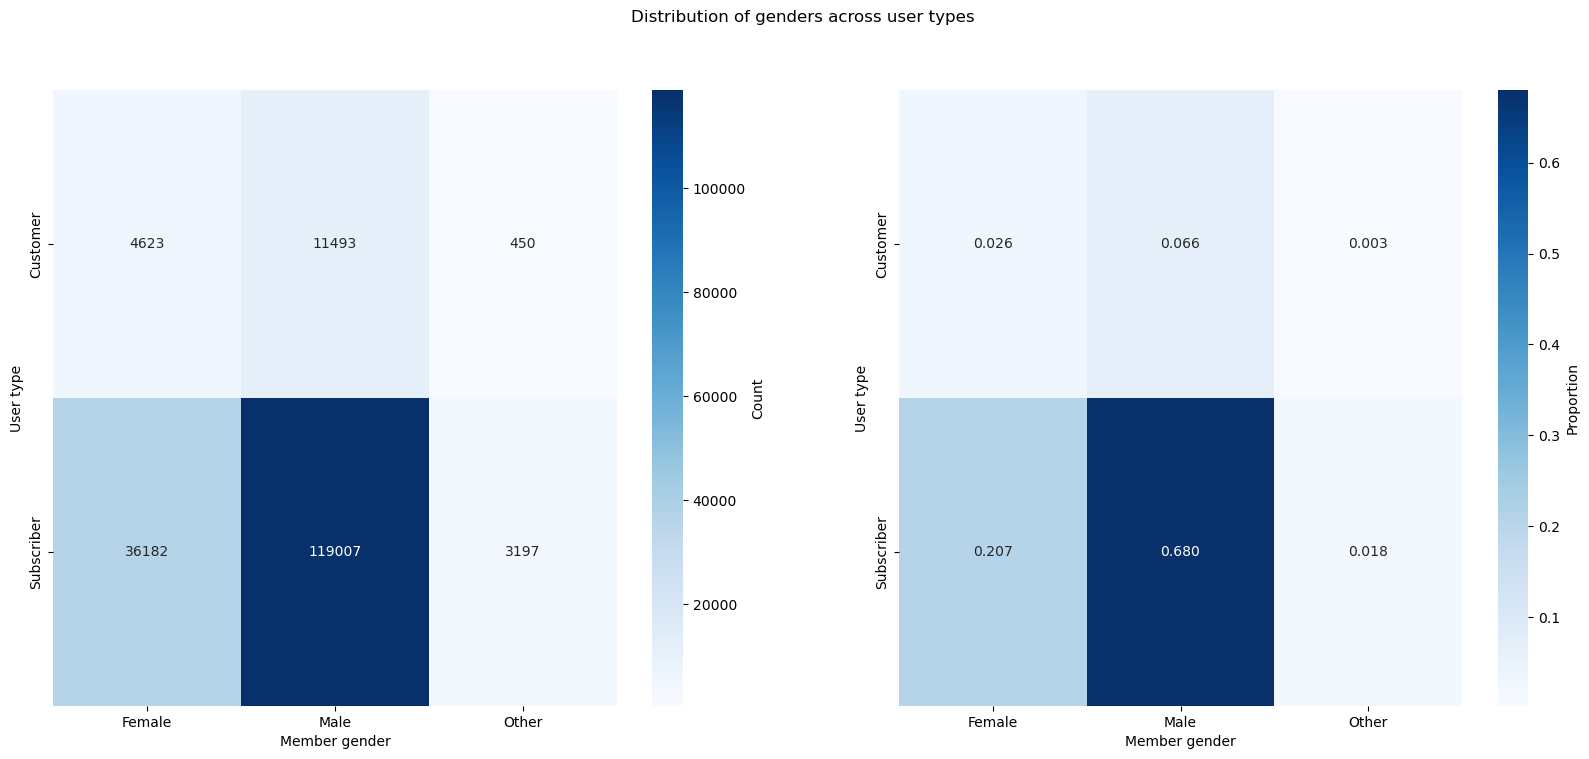

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(user_type_gender_group, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar_kws={'label': 'Count'})
ax1.set_ylabel('User type')
ax1.set_xlabel('Member gender')

sns.heatmap(user_type_gender_group_proportion, annot=True, fmt='.3f', cmap='Blues', ax=ax2, cbar_kws={'label': 'Proportion'})
ax2.set_ylabel('User type')
ax2.set_xlabel('Member gender')

fig.suptitle('Distribution of genders across user types');

#### observation

The figure further illustrates the dominant amount of males in the dataset compared to other genders. The dataset is highly concentrated by male subscribers, who are more than 3x as frequent as the next largest group, female subscribers. Even among customers, the males are still almost 2.5x the females.

### age and duration

#### question: is there any discernable trend between member age and trip duration?

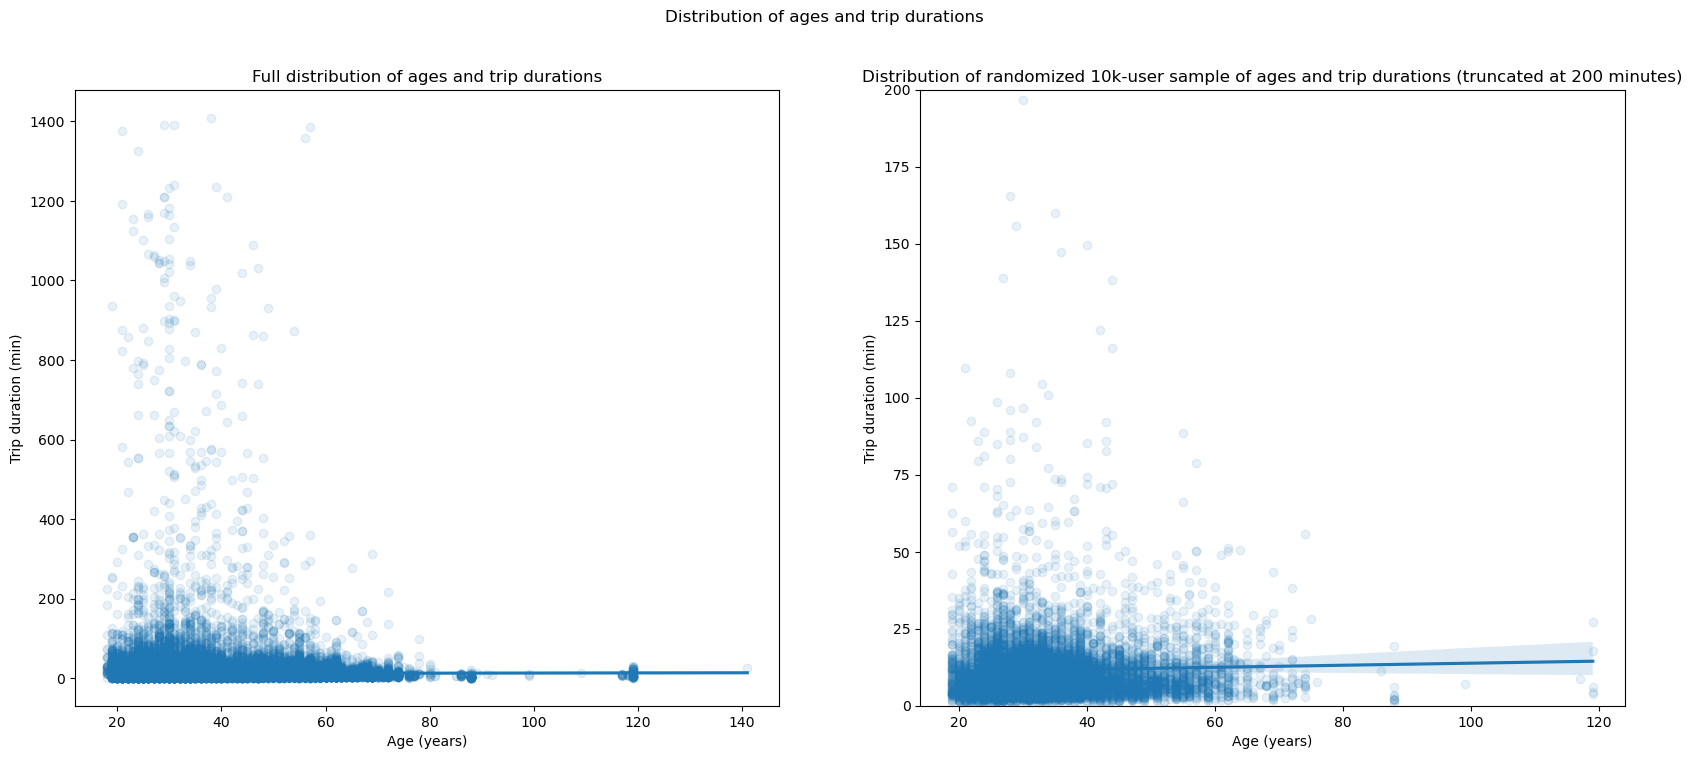

In [53]:
gobike_10k_subset = gobike.sample(round(1e4))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.regplot(data=gobike, x='age', y='duration_min', scatter_kws={'alpha': 0.1}, ax=ax1)
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Trip duration (min)')
ax1.set_title('Full distribution of ages and trip durations')

sns.regplot(data=gobike_10k_subset, x='age', y='duration_min', scatter_kws={'alpha':0.1})
ax2.set_ylim(0, 200)
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Trip duration (min)')
ax2.set_title('Distribution of randomized 10k-user sample of ages and trip durations (truncated at 200 minutes)')

fig.suptitle('Distribution of ages and trip durations');

#### observation

The figure reinforces the earlier seen trend that most trips are shorter than 40 minutes, and that the majority of trips are done by users younger than 60 years old. This figure further highlights that the longest trips tend to be taken by younger and middle aged users.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Some of the more unexpected and interesting trends were that
- women appeared to take slightly longer trips than men, though this difference seemed quite slight.
- customers appeared to take longer trips than subscribers.
- People who reported their gender as "Other" had the highest average age, and their age distribution was bimodal with an even higher age (closer to 60) taking up the second peak. Given that the sample size for this category was so small, it's hard to draw any conclusions from this.
- Longer trips tended to happen on either side of sunrise and sunset, perhaps because commuters who use the bikes only need to travel shorter distances and are therefore amenable to using bikes.
- Younger users tended to use the bikes at later hours when the sun is down, compared to more middle age users who used the bikes more often during the sunlit hours.
- The majority of long trips were taken by younger and middle aged users.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Age, duration and member gender
#### question: does the gender have an effect on the relationship between age and trip duration?

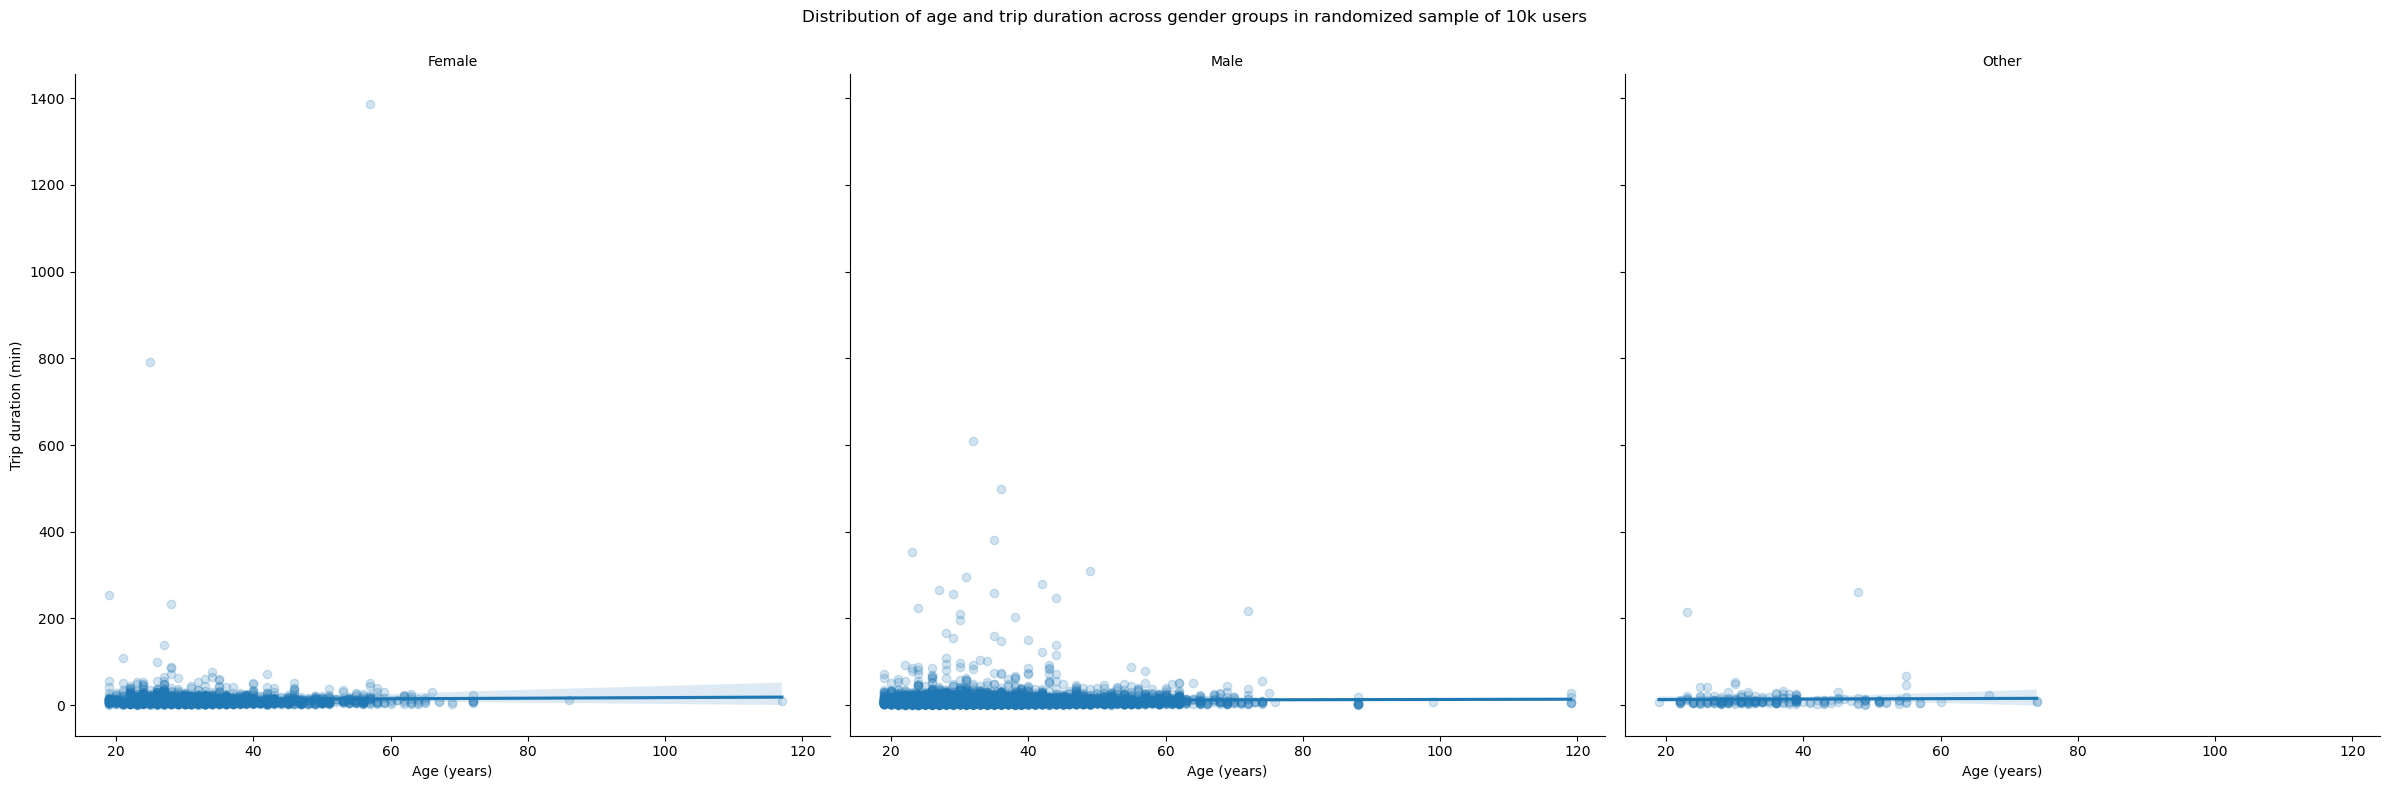

In [54]:
g = sns.FacetGrid(data=gobike_10k_subset, col='member_gender', height=8)
g.map(sns.regplot, 'age', 'duration_min', scatter_kws={'alpha':0.2})
g.set_titles('{col_name}')
g.set_xlabels('Age (years)')
g.set_ylabels('Trip duration (min)')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of age and trip duration across gender groups in randomized sample of 10k users');

#### observation

There doesn't appear to be a trend across gender for the relationship between trip duration and age. The plot offers another demonstration of the clustering of data between the ages of 20 and 70, and the clustering of trip durations below 50 mins. The plot for males contains more data points expectedly, but the range of ages remain similar to that for women.

### Age, duration and user type
#### question: does the user type have an effect on the relationship between age and trip duration?

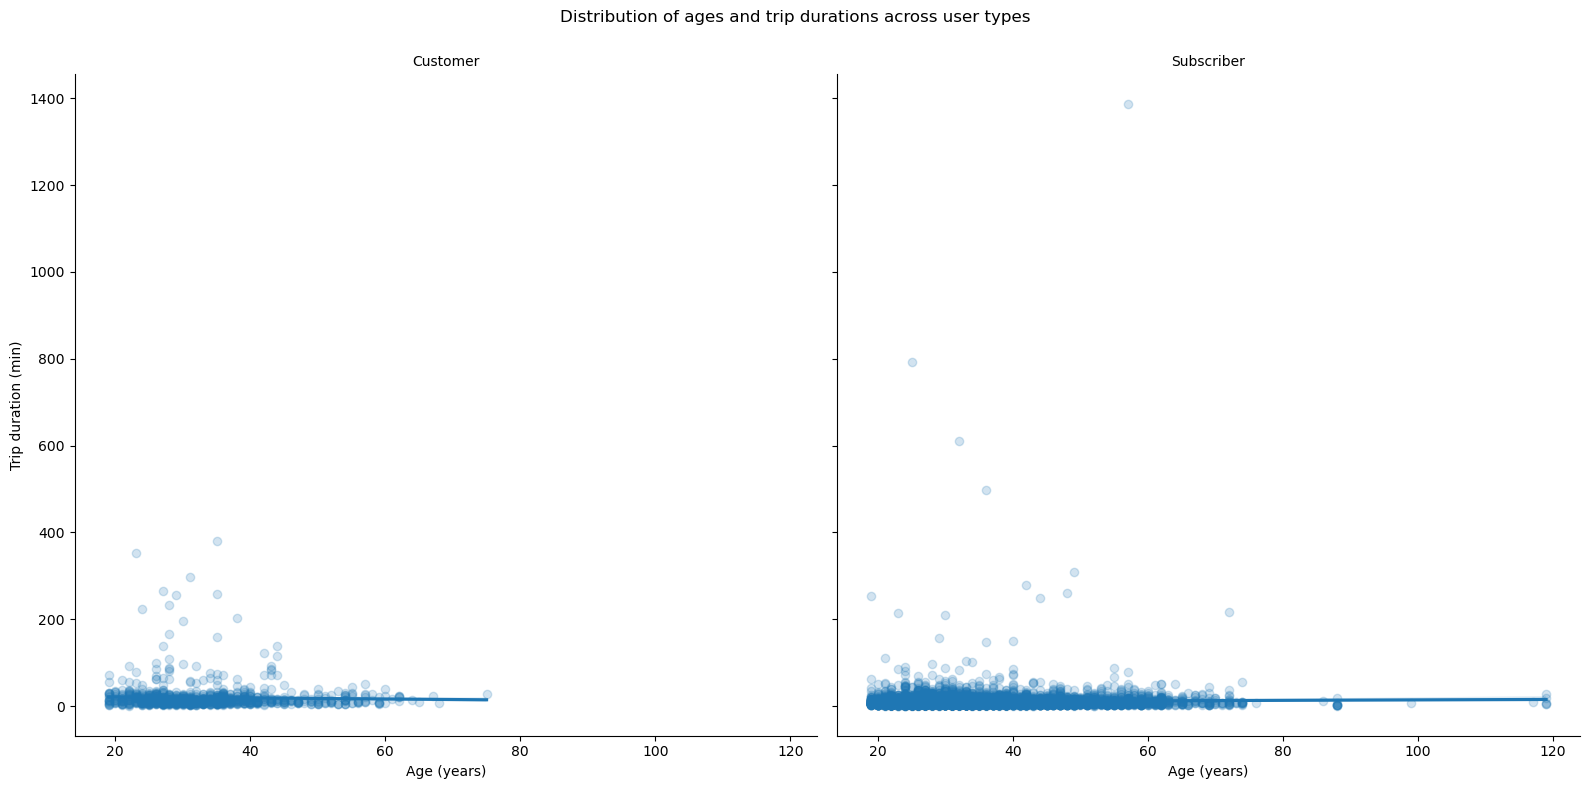

In [55]:
g = sns.FacetGrid(data=gobike_10k_subset, col='user_type', height=8)
g.map(sns.regplot, 'age', 'duration_min', scatter_kws={'alpha':0.2})
g.set_titles('{col_name}')
g.set_xlabels('Age (years)')
g.set_ylabels('Trip duration (min)')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of ages and trip durations across user types');

#### observation

There doesn't appear to be a strong trend across user type for the relationship between trip duration and age. Interestingly, however, there are more longer duration trips for subscribers than for customers, which is the opposite of what was seen earlier. This is both a pecularity of the sample used for this plot, and also an demonstration of how the larger number of subscribers keeps a lower mean trip duration for that group despite having a higher absolute number of longer duration trips than customers.

### user type, gender, and duration

#### question: are there noticeable trends in the relationships between user type, gender, and trip duration?

In [56]:
duration_min_weights = gobike.duration_min / gobike.apply(lambda x: user_type_gender_group.loc[x.user_type, x.member_gender], axis=1)
duration_min_weights.head()

0    0.075676
1    0.089698
2    0.190231
3    0.000222
4    0.000251
dtype: float64

In [57]:
user_type_gender_group_duration_min = gobike.groupby(['user_type', 'member_gender']).mean(numeric_only=True).duration_min.reset_index(name='mean_duration_min').pivot(index='user_type', values='mean_duration_min', columns='member_gender')
user_type_gender_group_duration_min

member_gender,Female,Male,Other
user_type,,,
Customer,23.735414,20.893239,26.704911
Subscriber,11.607143,10.271093,15.202859


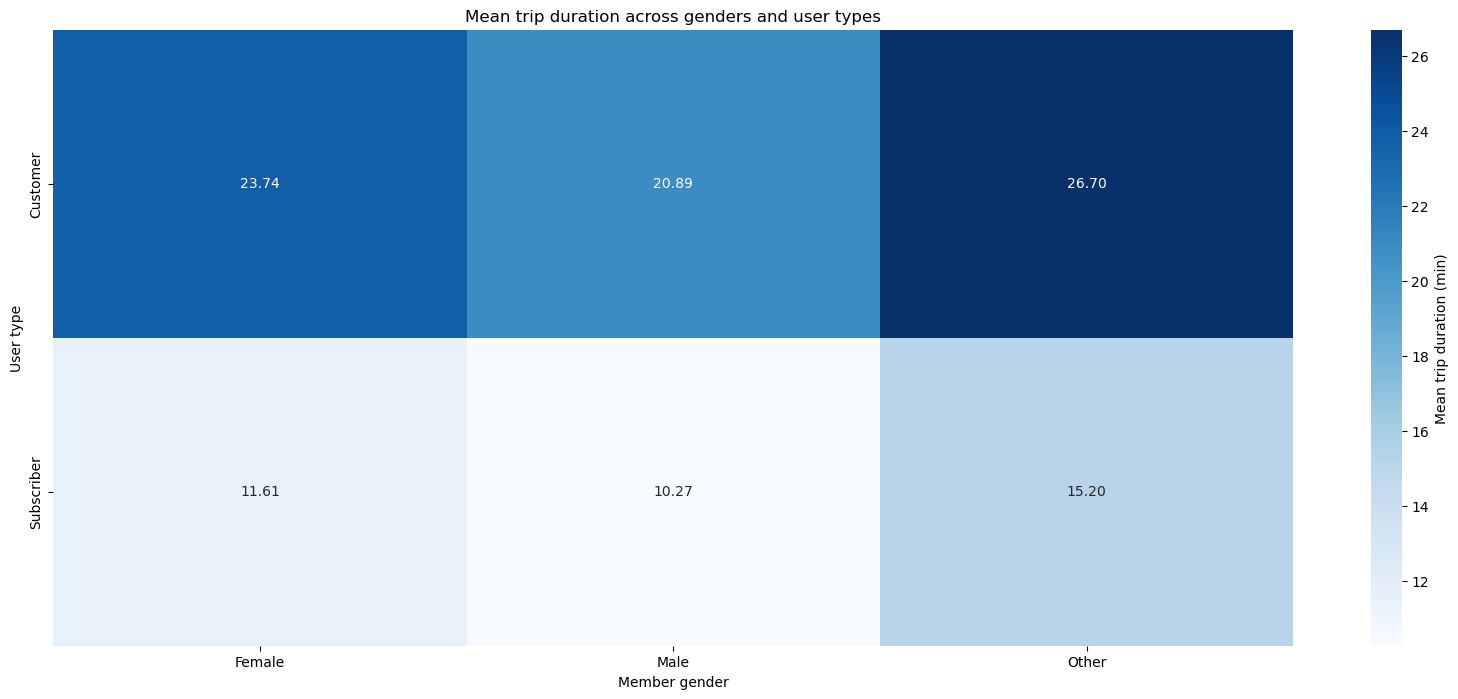

In [58]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.heatmap(user_type_gender_group_duration_min, annot=True, fmt='.2f', cmap='Blues', ax=ax, cbar_kws={'label': 'Mean trip duration (min)'})
ax.set_ylabel('User type')
ax.set_xlabel('Member gender')
ax.set_title('Mean trip duration across genders and user types');

#### observations

For all 3 genders, the trip duration was longer among customers compared to suppliers, and only in the "Other" gender group was the customer average trip duration less than twice as long as that of the subscribers. This reveals a bigger difference in trip duration than was seen in the earlier plots of trip duration vs user type. More so, the earlier bivariate plot indicated that males tended to have the lowest average trip durations than the other 2 gender groups, and that distinction is more clearly highlighted by this figure, with males having the lowest means for both user types.

### start/end time, age and gender

#### question: does gender have an effect on the relationship between start/end time and age?

In [59]:
gobike['start_time_hour'] = gobike.start_time.apply(lambda x: x.hour)

gobike_10k_subset['start_time_hour'] = gobike_10k_subset.start_time.apply(lambda x: x.hour)
gobike_10k_subset.start_time_hour.head()

121569    16
102427    16
100874    21
155762     9
102764    14
Name: start_time_hour, dtype: int64

In [60]:
gobike['end_time_hour'] = gobike.end_time.apply(lambda x: x.hour)

gobike_10k_subset['end_time_hour'] = gobike_10k_subset.end_time.apply(lambda x: x.hour)
gobike_10k_subset.end_time_hour.head()

121569    16
102427    16
100874    21
155762     9
102764    14
Name: end_time_hour, dtype: int64

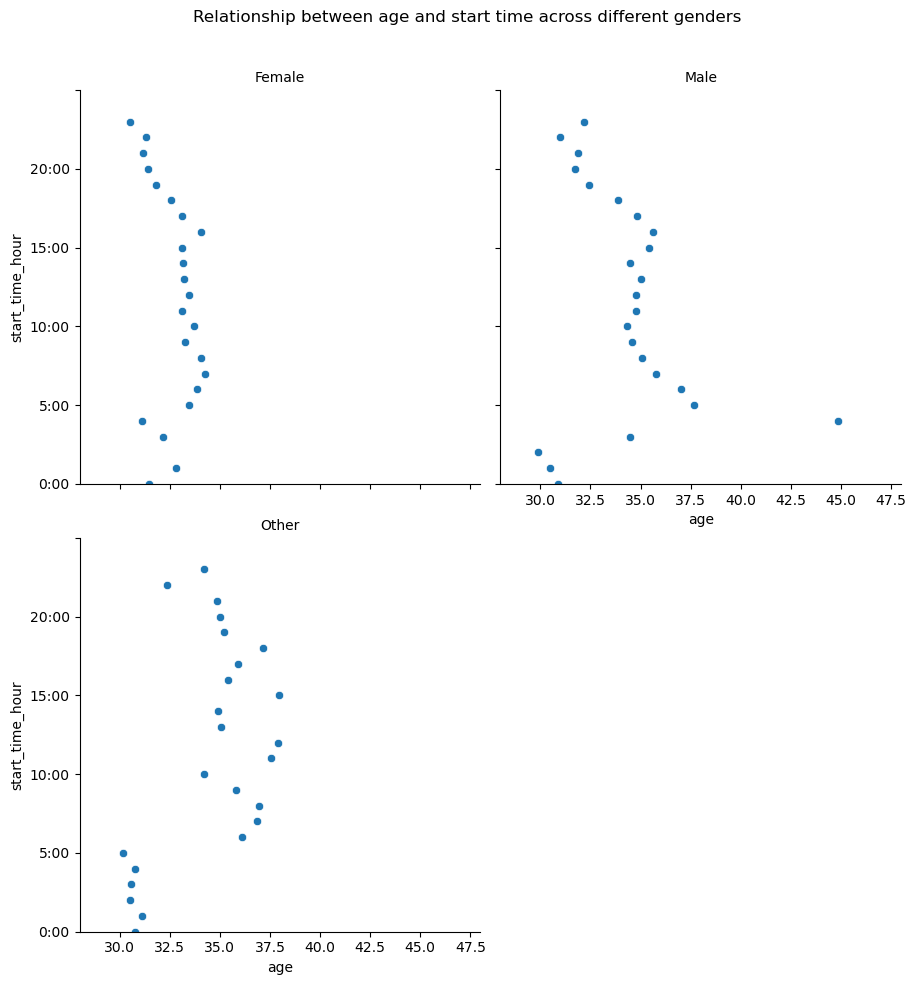

In [61]:
rp = sns.relplot(data=gobike.groupby(['start_time_hour', 'member_gender']).mean(numeric_only=True).reset_index(), y='start_time_hour', x='age', col='member_gender', kind='scatter', aspect=0.9, col_wrap=2)
rp.set(ylim=(0, 24), xlim=(28, 48))
rp.set_titles('{col_name}')
rp.fig.subplots_adjust(top=0.9)
rp.set_yticklabels([f'{i}:00' if i < 25 else '' for i in [0, 5, 10, 15, 20, 25]])
rp.fig.suptitle('Relationship between age and start time across different genders');

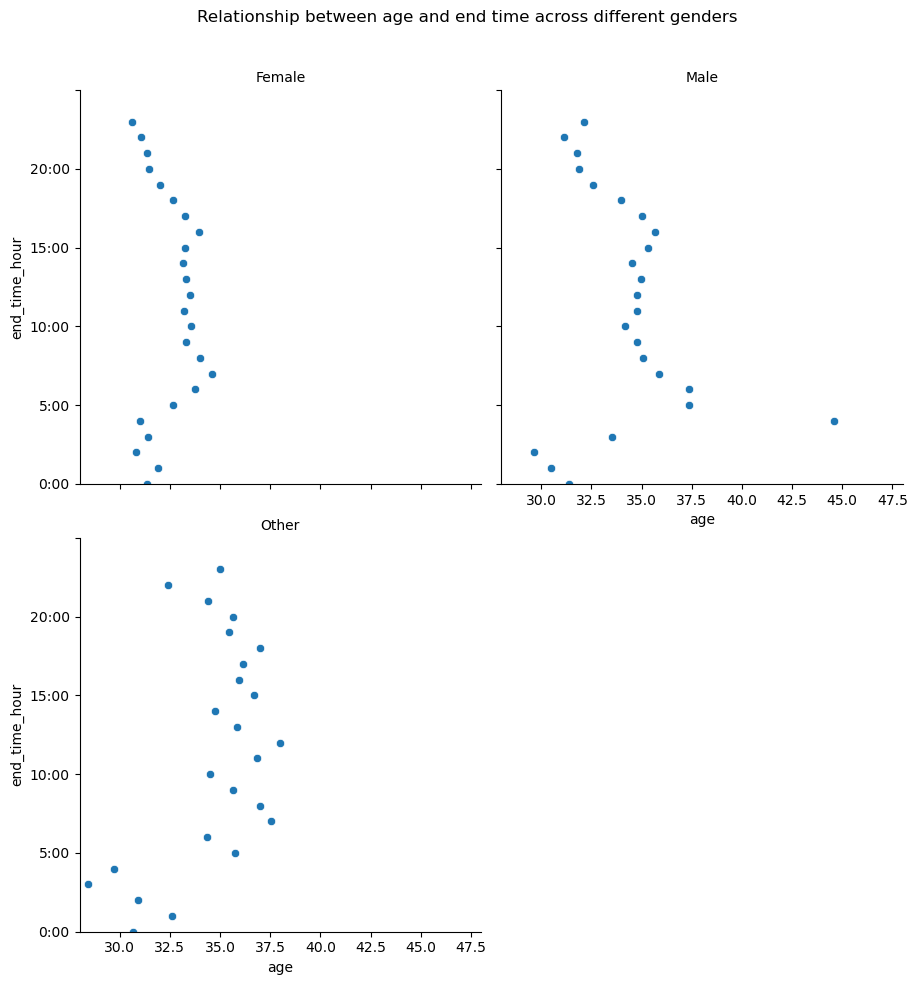

In [62]:
rp = sns.relplot(data=gobike.groupby(['end_time_hour', 'member_gender']).mean(numeric_only=True).reset_index(), y='end_time_hour', x='age', col='member_gender', kind='scatter', aspect=0.9, col_wrap=2)
rp.set(ylim=(0, 24), xlim=(28, 48))
rp.set_titles('{col_name}')
rp.fig.subplots_adjust(top=0.9)
rp.set_yticklabels([f'{i}:00' if i < 25 else '' for i in [0, 5, 10, 15, 20, 25]])
rp.fig.suptitle('Relationship between age and end time across different genders');

#### observation

Interestingly, these charts reveal that males were responsible for the spike in average age of early morning riders seen in the bivariate plots of start/end time and age. The trend of younger riders taking later rides is still evident across males and females, though it's more pronounced with males. Among the "Other" group, the age of users only dropped noticeably for morning rides, indicating that the middle aged and older users in this group were more willing to take rides well into the evening.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The first notable observation is the consistency of the distribution of age and trip duration even when broken down by gender and user type. Generally across all groups of these categories, trip durations were rarely longer than 40 minutes, most of which were taken by users between the ages of 20 and 70.

The second interesting observation was that customers take longer trips than subscribers, more than twice as long for the majority of users (male and female but not "Other"). Given that customers use the bikes less often (hence their low representation in the dataset), this revelation may indicate that customers tend to use the bikes to cover larger distances, as opposed to subscribers who use the bikes for shorter commutes to maximize the value of their subscription.

The third interesting observation was that age of users who identified gender as "Other" did not closely follow the general trend of younger users taking longer trips. Perhaps this may be due to the small sample size of this group, but it's also possible that the "Other" group may be more diverse in terms of age and trip duration.

Last but surely not least, there was a noticeable yet unexpected observation that older users seemed to take trips between the hours of 4am and 5am, against the general trend of younger users taking trips when the sun is down. The multivariate plots revealed that this observation was driven by males and did not show up at all for other gender groups. 

### Were there any interesting or surprising interactions between features?

> Your answer here!

In [63]:
gobike.to_pickle('gobike_clean.pkl')

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



Exploring this dataset was a fun exercise. I was able to uncover some interesting trends in the biking stats for the Greater San Francisco Bay area. Initially some data wrangling was done to clean up missing values and convert the data into the appropriate formats, before analyzing the data to generate insightful visuals. The key insights were:
- trip durations were rarely longer than 40 minutes, most of which were taken by users between the ages of 20 and 70.
- subscribers appeared to take shorter trips than customers, probably to maximize the value of their subscription by using the bikes even for shorter distances.
- older males tended to take trips between the hours of 4am and 5am, going against the general trend of younger users taking trips at night time.